<a href="https://colab.research.google.com/github/Reetabisht/Bike-Rental-Counts/blob/main/Bike_Rental_(modeling1)_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dataset Description:
> Bike sharing systems are a new version of traditional bike rentals where the whole process from membership, rental and return back has been automated. Through these systems, users are easily able to rent a bike from a particular position and return back at another position. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems.

Problem Statement

> Task 1:- Prepare a complete data analysis report on the given data.

> Task 2:- Prediction of daily bike rental count based on the environmental and seasonal settings.


### Import Basic Libraries

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### Reading File

In [ ]:
df_daily = pd.read_csv('/content/day.csv')

In [ ]:
pd.set_option('display.max_columns',None)

## Basic checks

In [ ]:
df_daily.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df_daily.shape

(731, 16)

In [ ]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
df_daily.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


In [ ]:
df_daily.describe(include='O').T

,count,unique,top,freq
dteday,731,731,2011-01-01,1


In [ ]:
df_daily['weekday'].value_counts()

6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: weekday, dtype: int64

In [ ]:
# Hourly count dataset
df_hourly = pd.read_csv('/content/hour.csv')

In [ ]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Exploratory Data Analysis

In [ ]:
df = df_daily.drop(['dteday','cnt'],axis=1) # dataframe of numerical datatype column without target variable 

In [ ]:
df.head(1)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,temp_daily
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,8.175849


In [ ]:
temp_daily = (df_daily['temp']*47)-8

In [ ]:
df_daily['temp_daily'] = temp_daily
df_daily.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_daily
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,8.175849
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,9.083466
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1.229108


In [ ]:
df_hourly['temp_hourly'] = temp_hourly
df_hourly.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_hourly
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,3.28
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2.34
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2.34


In [ ]:
df_daily.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


In [ ]:
df_hourly.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [ ]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


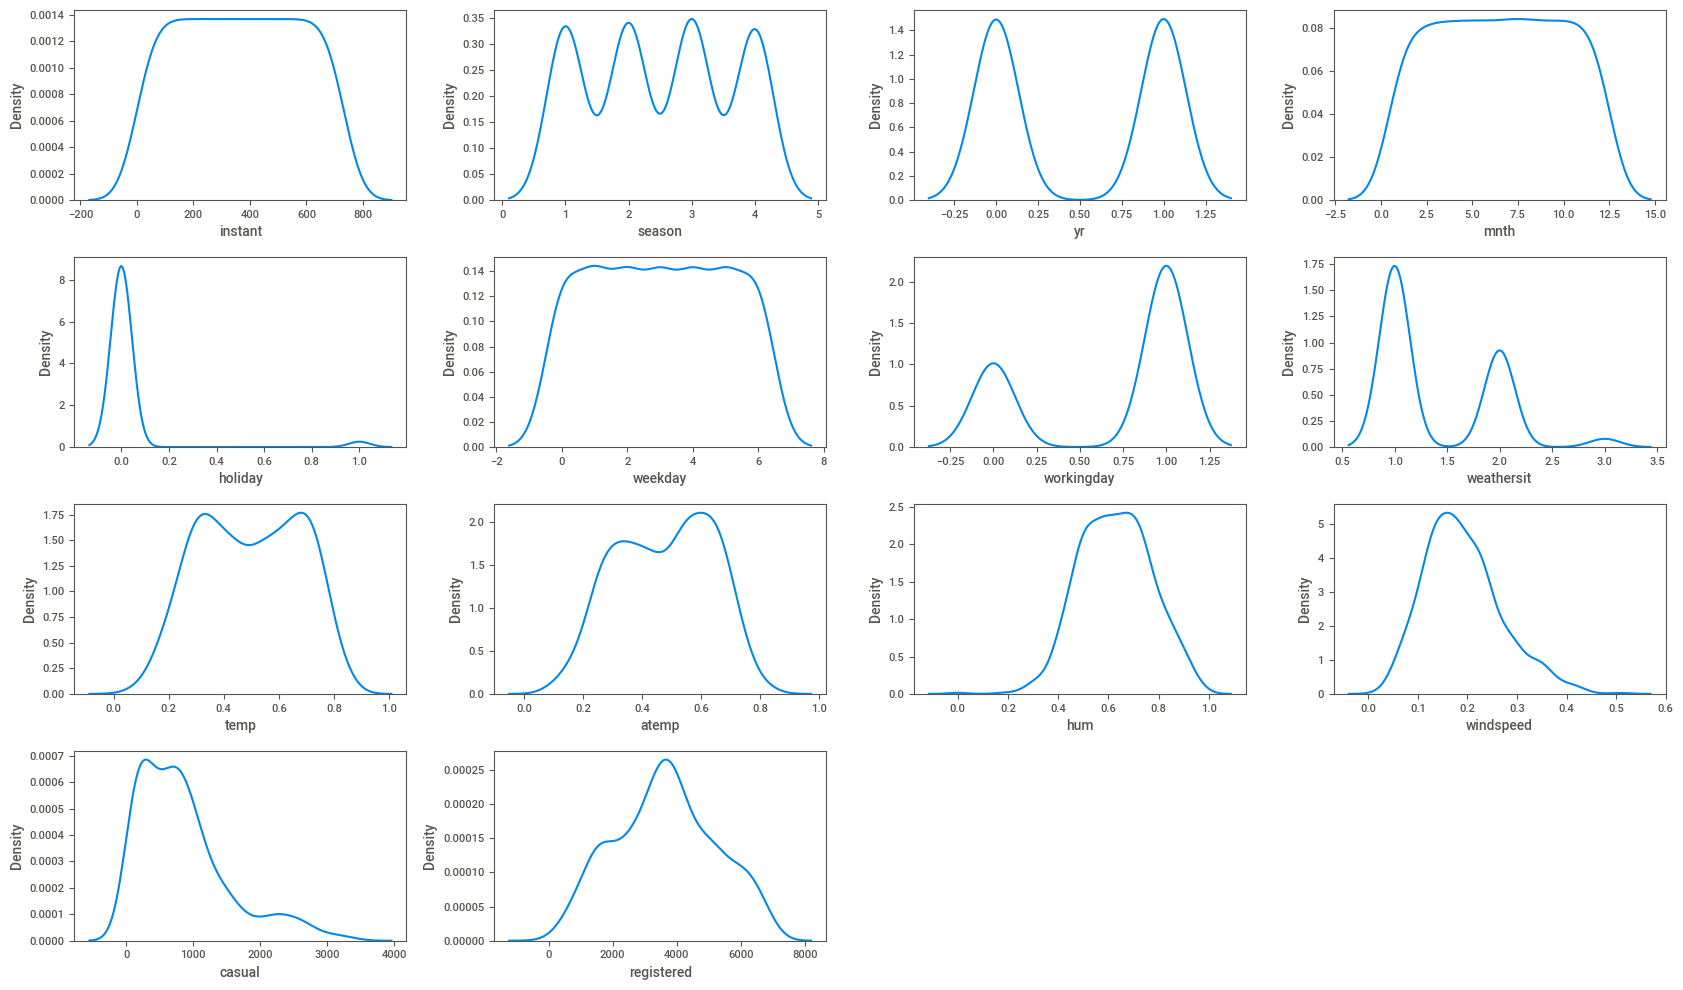

In [ ]:
plt.figure(figsize=(17,10))
plotnumber=1
for i in df.columns:
  plt.subplot(4,4,plotnumber)
  sns.kdeplot(df[i])
  plotnumber += 1
plt.tight_layout()

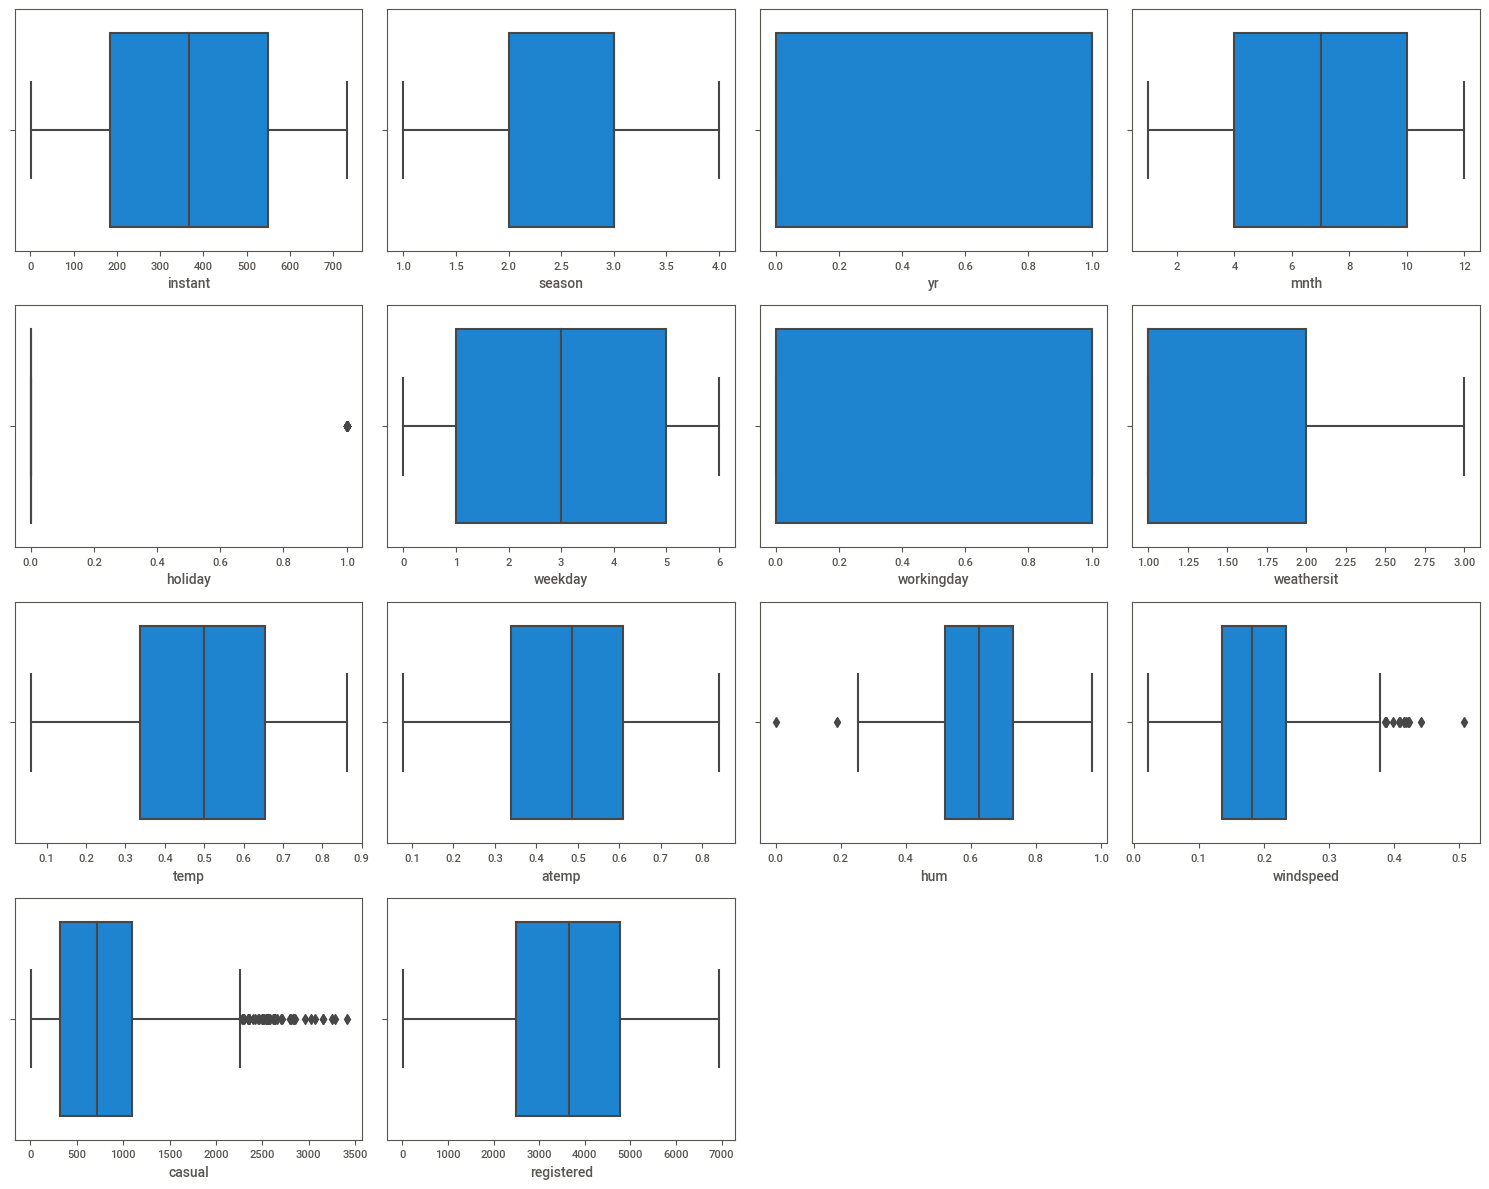

In [ ]:
# checking for outliers 
plt.figure(figsize = (15,12))
plotnumber = 1
for column in df.columns:
    ax = plt.subplot(4,4,plotnumber) # here plotnumber is showing perticular plot where we are plotting histogram for current iteration
    sns.boxplot(x=column,data =df)
    plotnumber = plotnumber + 1
plt.tight_layout()

* Some columns are having Outliers like Humidity,Windspeed,Casual we have to ignore or we have to treat these outliers.

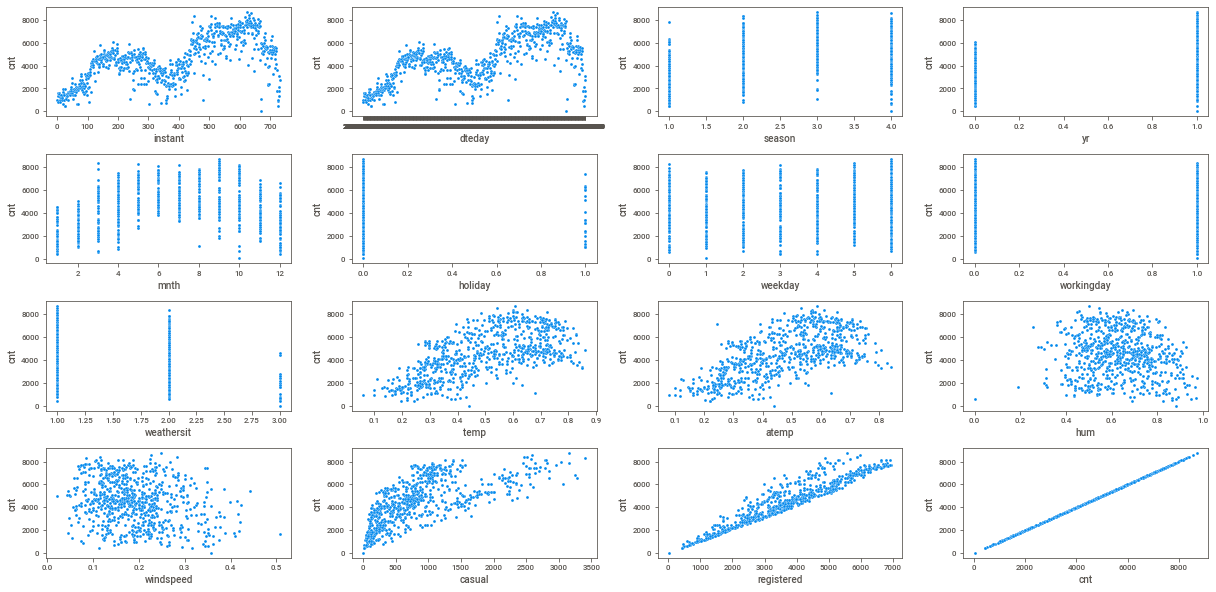

In [ ]:
# For daily bases dataset
plt.figure(figsize=(17,10))
plotnumber=1
for i in df_daily.columns:
  plt.subplot(5,4,plotnumber)
  sns.scatterplot(x=i,y='cnt',data=df_daily)
  plotnumber += 1
plt.tight_layout()

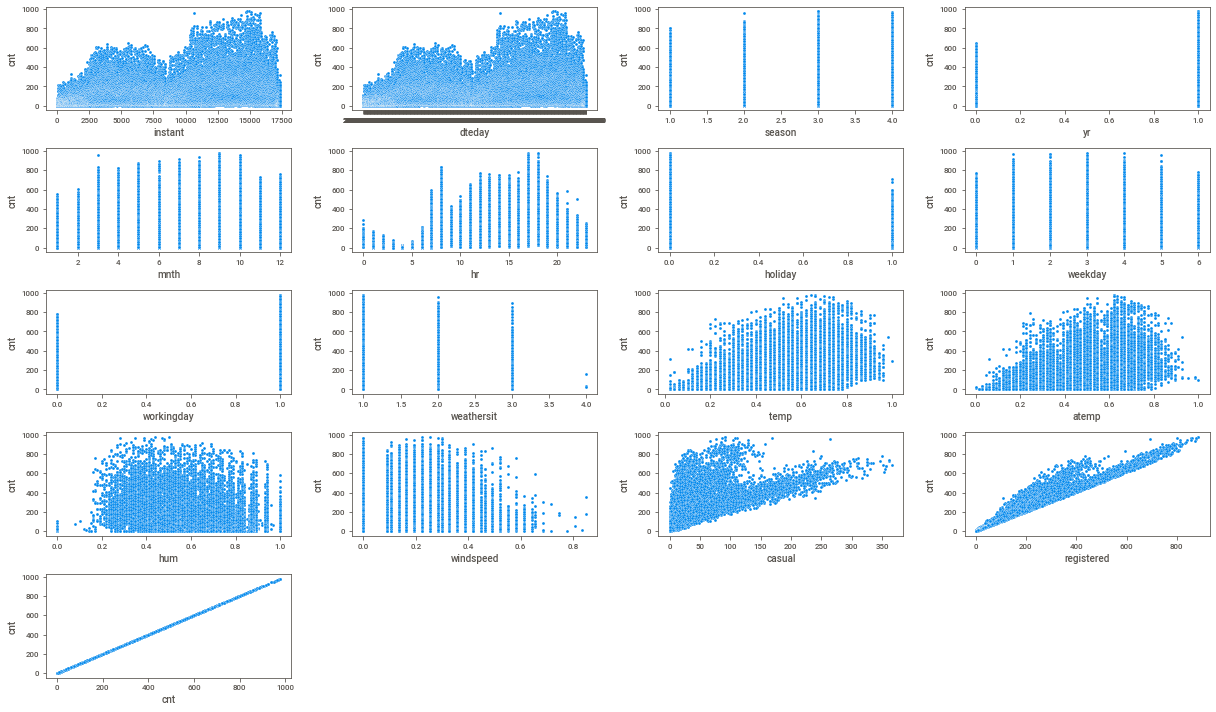

In [ ]:
# for hourly bases dataset
plt.figure(figsize=(17,10))
plotnumber=1
for i in df_hourly.columns:
  plt.subplot(5,4,plotnumber)
  sns.scatterplot(x=i,y='cnt',data=df_hourly)
  plotnumber += 1
plt.tight_layout()

In [ ]:
a = df_daily.groupby('yr')['cnt'].sum()
df = pd.DataFrame(a)
df

,cnt
yr,
0,1243103
1,2049576


* Total Rental bike count in Highest in 2012 than in 2011.

Text(0.5, 1.0, 'Yearly distribution of counts')

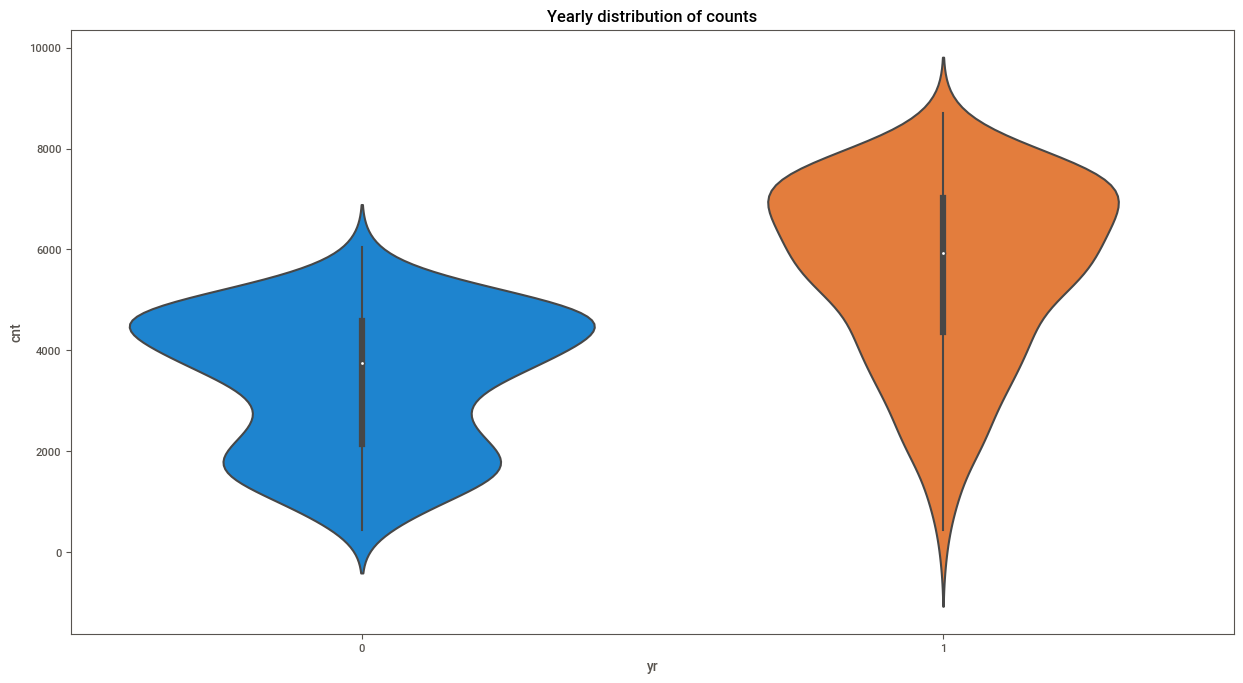

In [ ]:
plt.figure(figsize=(15,8))
sns.violinplot(x='yr',y='cnt',data=df_daily)
plt.title('Yearly distribution of counts')

0-----> 2011

1-----> 2012

* Per day Bike rental count is higher in 2012 than in 2011

Text(0.5, 1.0, 'seasonal distribution of counts')

<Figure size 1500x500 with 0 Axes>

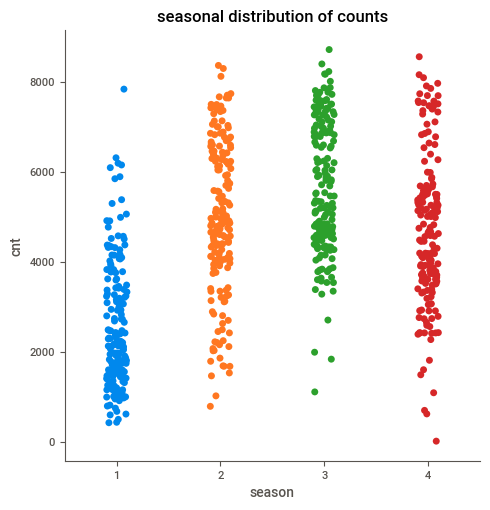

In [ ]:
plt.figure(figsize=(15,5))
sns.catplot(x='season',y='cnt',data=df_daily)
plt.title('seasonal distribution of counts')

1-------> spring season

2-------> summer season

3-------> fall season

4-------> winter season

* There is no as such change in bike rental count seasonly but on specific bike rental count is highest in fall season.

In [ ]:
a = df_daily.groupby('weathersit')['cnt'].sum()
df = pd.DataFrame(a)
print(df)
print('----------------------')
b = df_daily.groupby('weathersit')['casual'].sum()
df1 = pd.DataFrame(b)
print(df1)
print('----------------------')
c = df_daily.groupby('weathersit')['registered'].sum()
df2 = pd.DataFrame(c)
print(df2)

                cnt
weathersit         
1           2257952
2            996858
3             37869
----------------------
            casual
weathersit        
1           446346
2           169776
3             3895
----------------------
            registered
weathersit            
1              1811606
2               827082
3                33974


- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

> Total rental bike count,Total rental bike count by casual users and Total rental bike count by registeres users is highest in 1st type of weather condition than followed by 2nd type and 3rd type of weather condition.


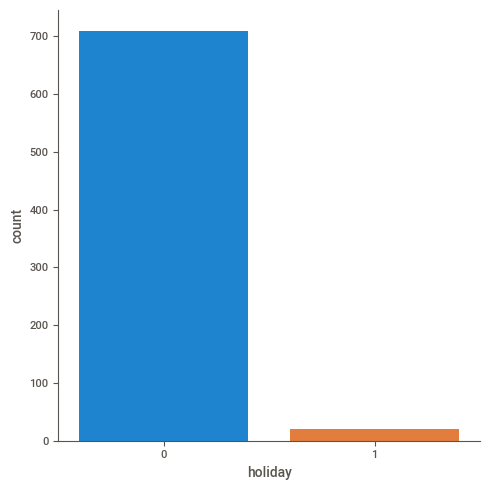

In [ ]:
#holiday
sns.factorplot(x='holiday',data=df_daily,kind='count',size=5,aspect=1) # majority of data is for non holiday days

Text(0.5, 1.0, 'Distribution of counts in holidays')

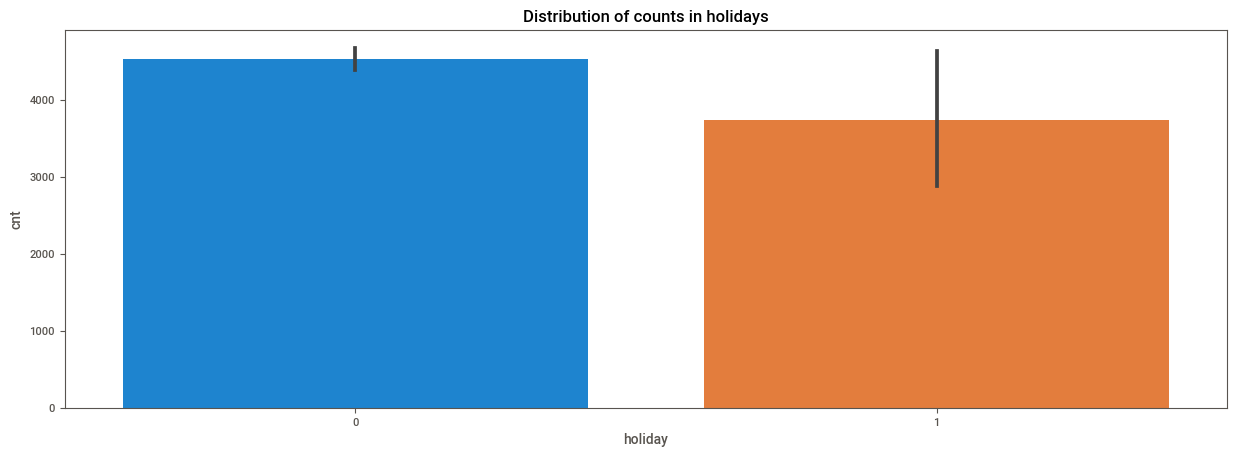

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='holiday',y='cnt',data=df_daily)
plt.title('Distribution of counts in holidays')

0--------> No holiday

1--------> Holiday
* On an average Bike rental count is high in No holidays than in holidays

In [ ]:
df_daily.groupby('holiday')['casual'].mean()

holiday
0     841.771831
1    1064.714286
Name: casual, dtype: float64

Text(0.5, 1.0, 'Distribution of casual_counts in holidays')

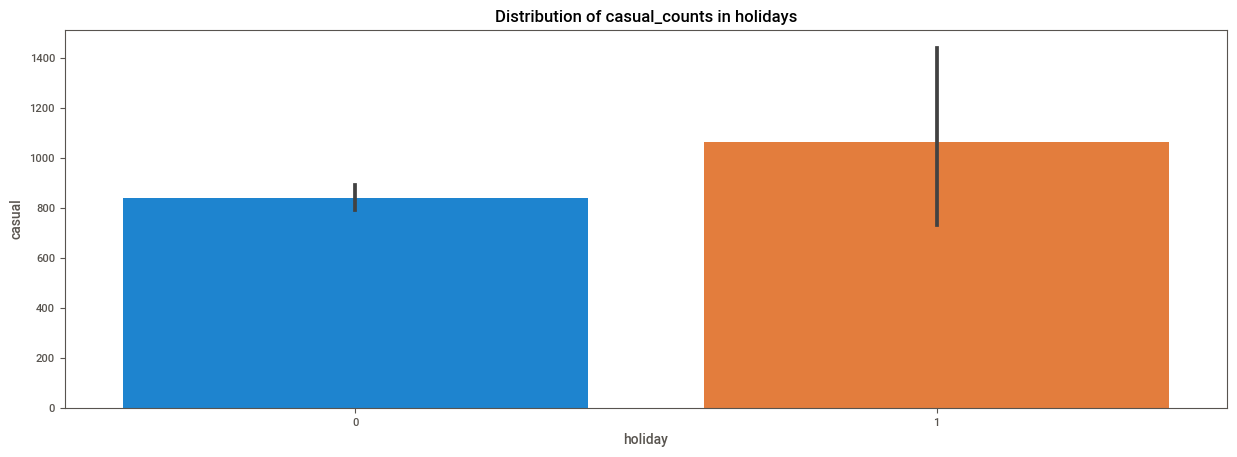

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='holiday',y='casual',data=df_daily)
plt.title('Distribution of casual_counts in holidays')

0--------> No holiday

1--------> Holiday
* On an average Bike rental casual count is high in holidays than in no holidays

Text(0.5, 1.0, 'Distribution of registered_counts in holidays')

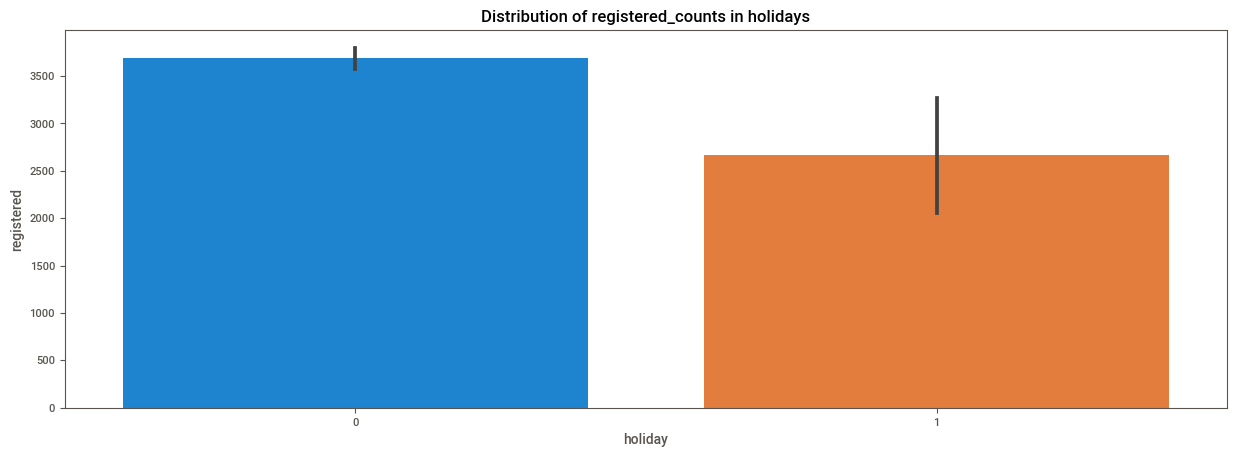

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='holiday',y='registered',data=df_daily)
plt.title('Distribution of registered_counts in holidays')

* On an average Registeres Bike rentalcount is high in No holidays than in holidays.

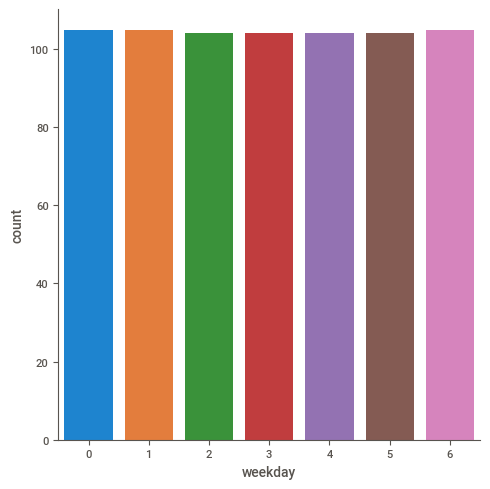

In [ ]:
#weekday
sns.factorplot(x='weekday',data=df_daily,kind='count',size=5,aspect=1) # majority of data is for non holiday days

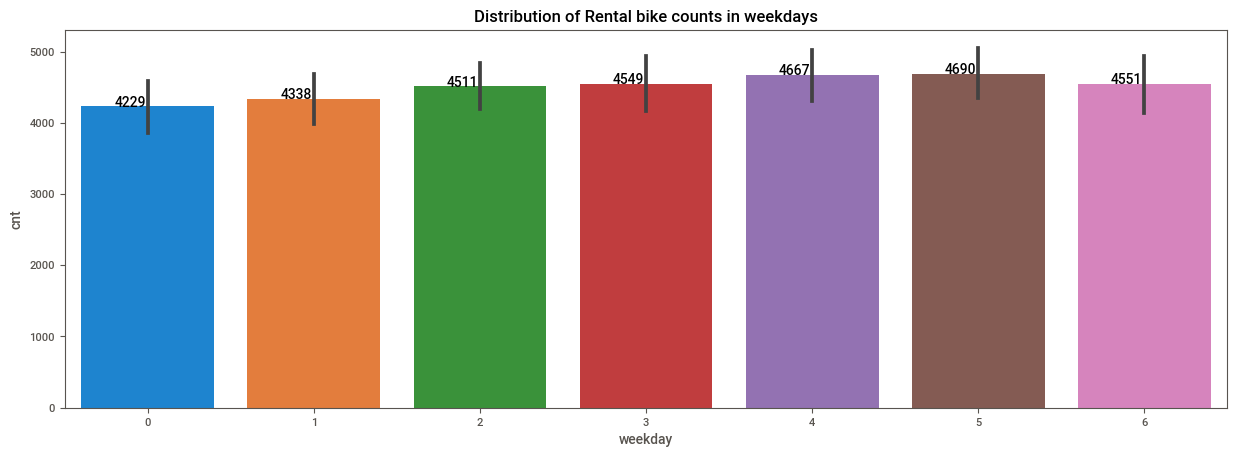

In [ ]:
plt.figure(figsize=(15,5))
ax= sns.barplot(x='weekday',y='cnt',data=df_daily)
plt.title('Distribution of Rental bike counts in weekdays')
for p in ax.patches:
    ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+0.01))

* On an average Bike rental Counts is increasing from Monday-Friday in weekdays and less in counts in weekend(Saturday and Sunday).

Text(0.5, 1.0, 'Distribution of Casual Rental bike counts in weekdays')

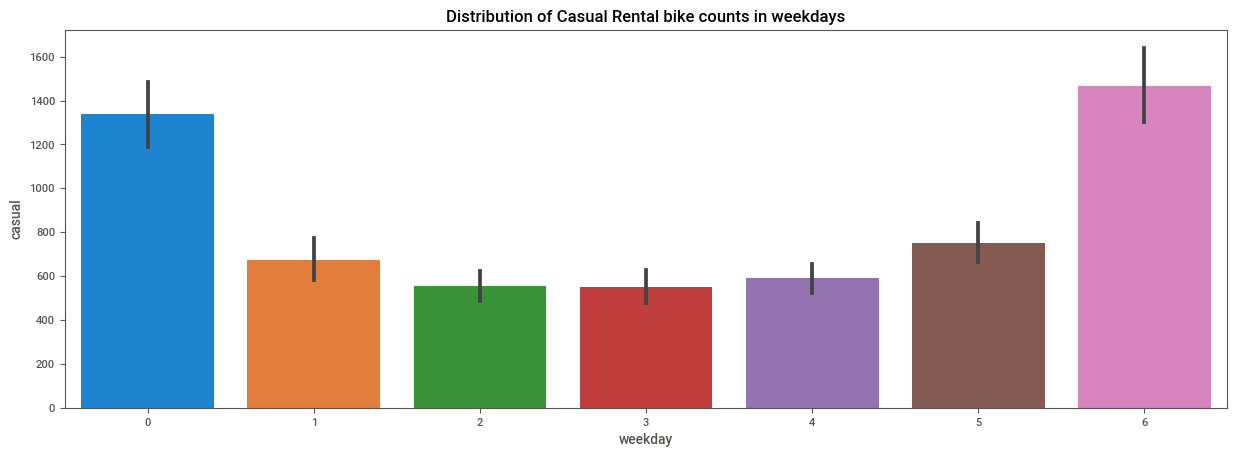

In [ ]:
plt.figure(figsize=(15,5))
ax= sns.barplot(x='weekday',y='casual',data=df_daily)
plt.title('Distribution of Casual Rental bike counts in weekdays')

* Casual Bike rental Counts is high in weekend(Saturday and Sunday) than other weekdays.

Text(0.5, 1.0, 'Distribution of registered Rental bike counts in weekdays')

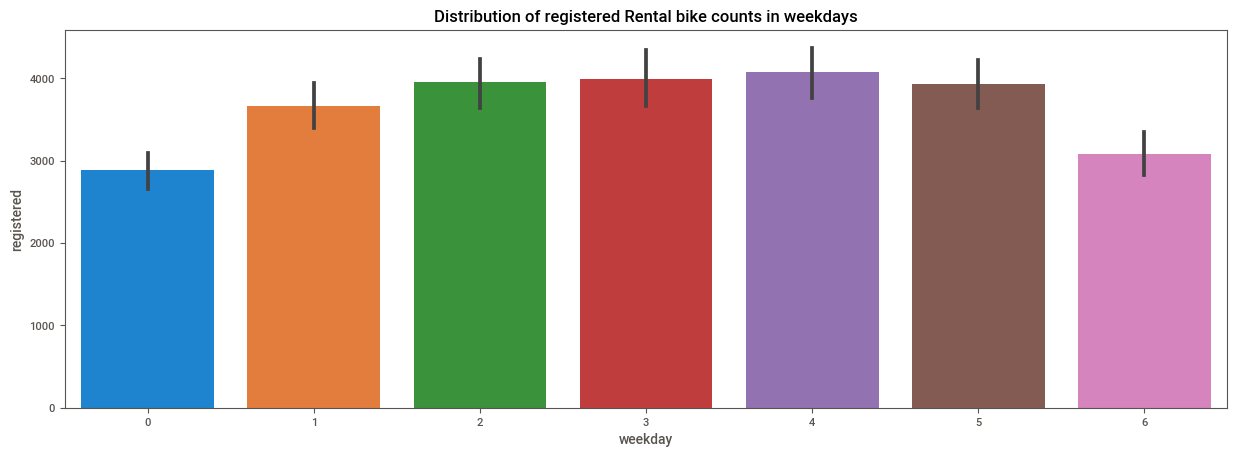

In [ ]:
plt.figure(figsize=(15,5))
ax= sns.barplot(x='weekday',y='registered',data=df_daily)
plt.title('Distribution of registered Rental bike counts in weekdays')

* Registered Bike rental count is highest in 3 weekdays (Tuesday,Wednesday and Thursday).

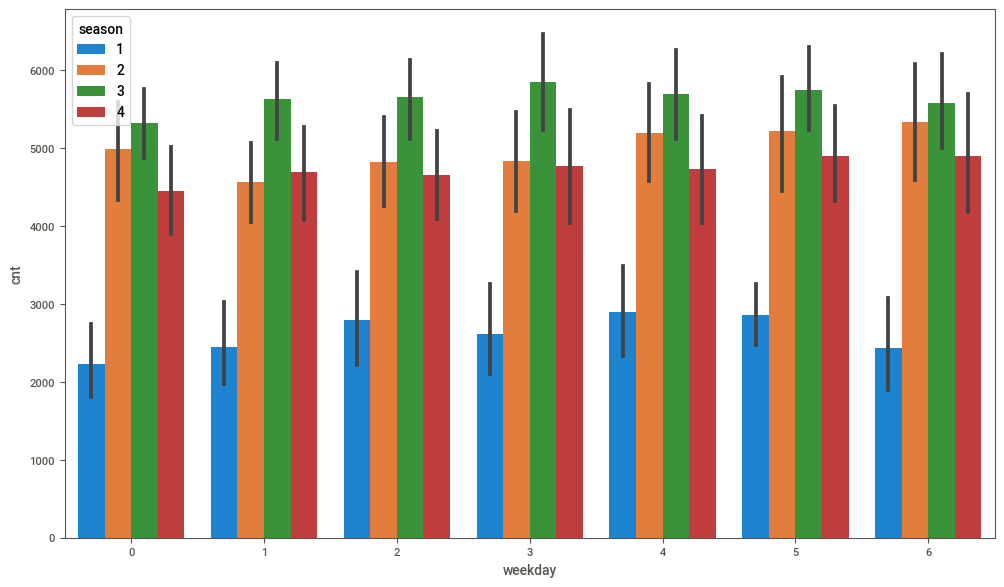

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x='weekday',y='cnt',hue='season',data=df_daily)

* From the above bar plot, we can observed that during weekdays from 1 to 5 the bike rental counts is quite highest compared to during weekday 0 and 6 for different seasons.

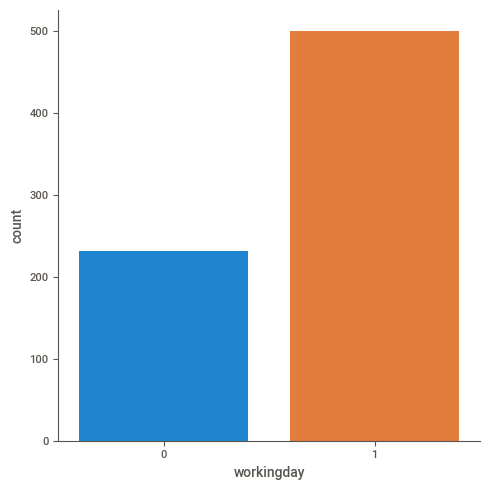

In [ ]:
#workingday
df_daily.workingday.value_counts()
sns.factorplot(x='workingday',data=df_daily,kind='count',size=5,aspect=1) # majority of data is for working days.

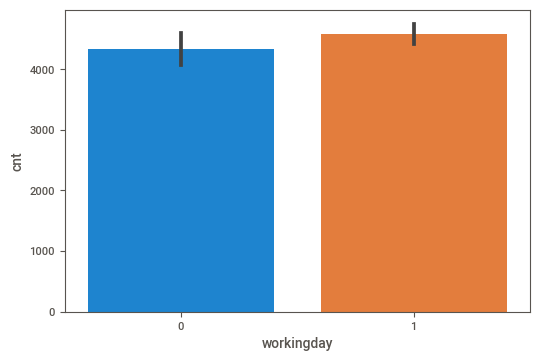

In [ ]:
sns.barplot(x=df_daily.workingday,y = df_daily.cnt)

0-------> No working day (Weekend or Holiday)

1-------> Working day(Neither weekend Nor holiday)

* Bike Rental count is high in Working days than Non working days.

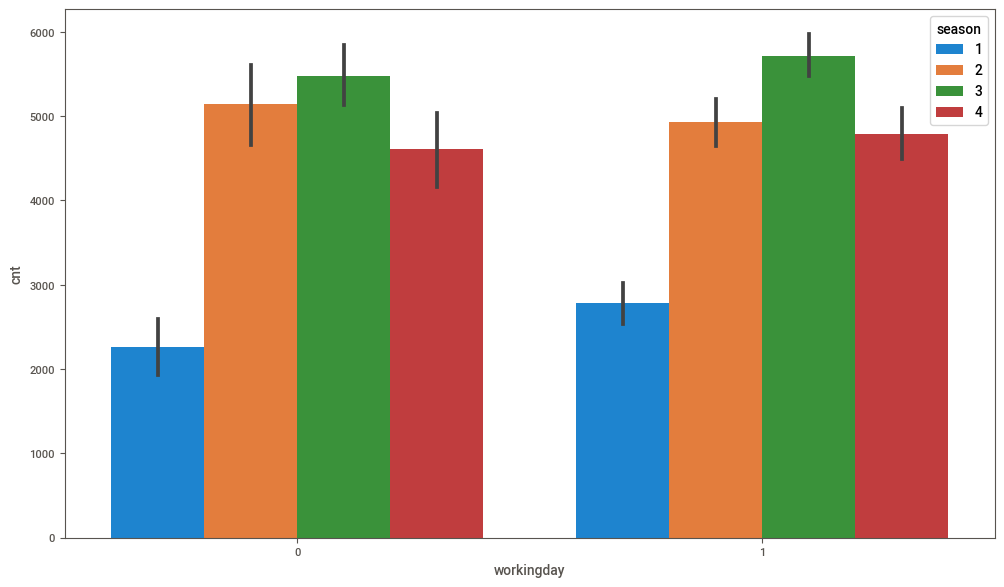

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x='workingday',y='cnt',hue='season',data=df_daily)

* From the above bar plot, we can observed that during workingday the bike rental counts is quite highest compared to during no workingday for different seasons.

<Figure size 1600x500 with 0 Axes>

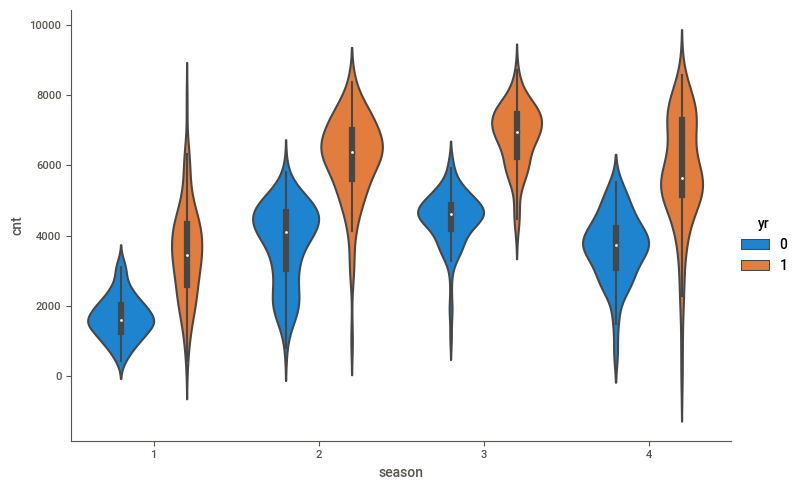

In [ ]:
plt.figure(figsize=(16,5))
sns.factorplot(x="season",y="cnt",data=df_daily,hue='yr',kind='violin',size=5,aspect=1.5)
plt.show()

In [ ]:
df_daily.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

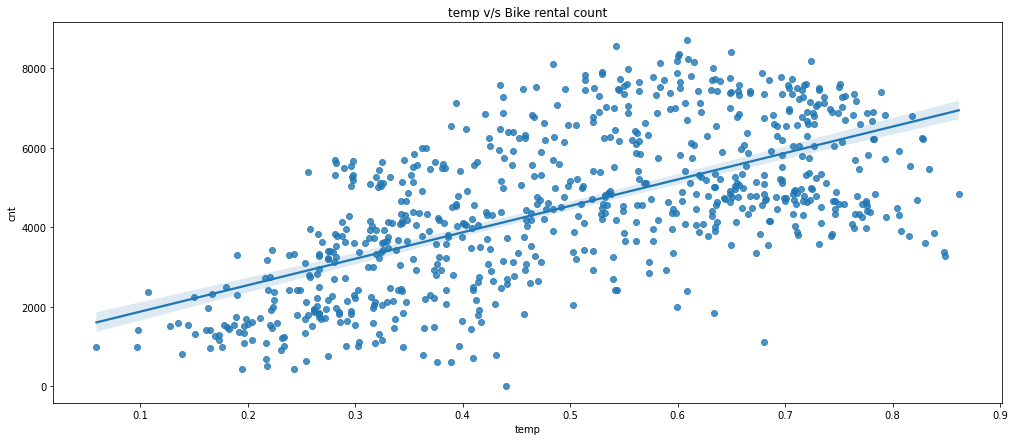

In [ ]:
# Normalised temp analysis
plt.figure(figsize=(17,7))
sns.regplot('temp','cnt',data=df_daily).set(title='temp v/s Bike rental count')
plt.show()


[Text(0.5, 1.0, 'temp v/s Bike rental count')]

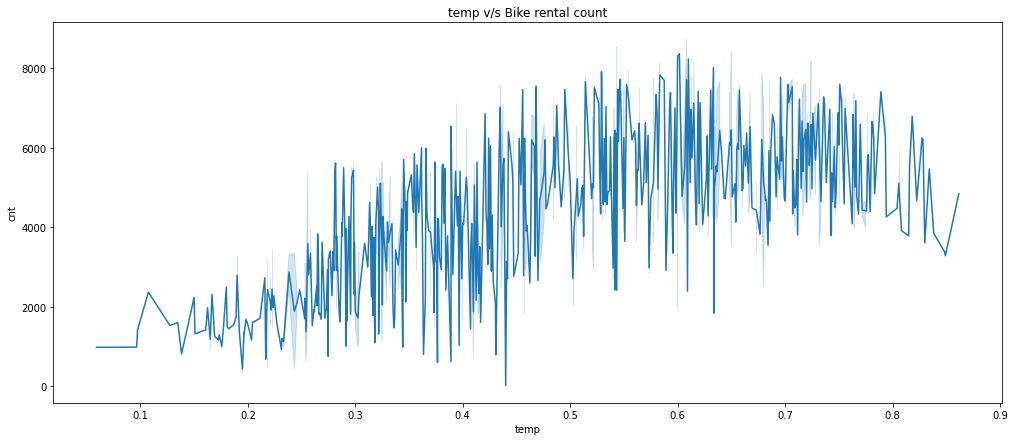

In [ ]:
# Normalised temp analysis
plt.figure(figsize=(17,7))
sns.lineplot('temp','cnt',data=df_daily).set(title='temp v/s Bike rental count')

[Text(0.5, 1.0, 'temp v/s Bike rental count')]

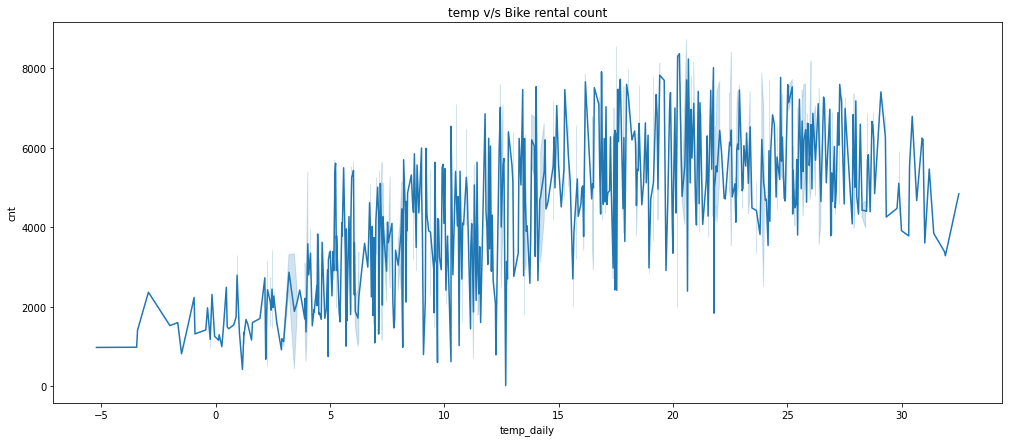

In [ ]:
# Daily temp analysis
plt.figure(figsize=(17,7))
sns.lineplot('temp_daily','cnt',data=df_daily).set(title='temp v/s Bike rental count')

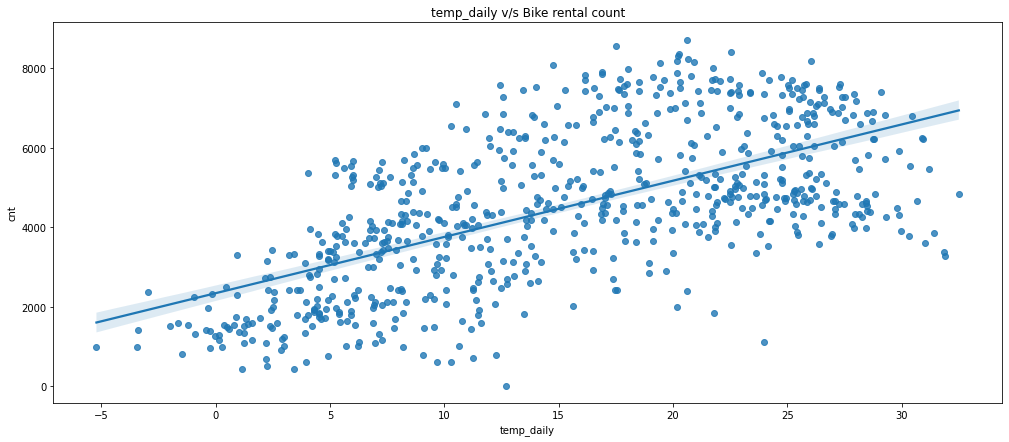

In [ ]:
# Daily temp analysis
plt.figure(figsize=(17,7))
sns.regplot('temp_daily','cnt',data=df_daily).set(title='temp_daily v/s Bike rental count')
plt.show()


In [ ]:
print(df_daily['temp_daily'].min())
print('---------------------------')
print(df_daily['temp_daily'].max())

-5.2208711999999995
---------------------------
32.498349


In [ ]:
new_df=df_daily.copy()
new_df['temp_bin']=np.floor(new_df['temp_daily'])//5 # we are creating bins of szie 5
# floor() method rounds a number DOWN to the nearest integer, if necessary, and returns the result
new_df['temp_bin'].unique()


array([ 1.,  0., -1., -2.,  2.,  3.,  4.,  5.,  6.])

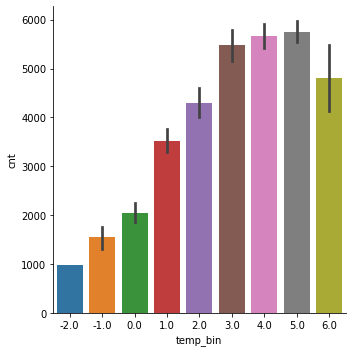

In [ ]:
# now we can visualize as follows
sns.factorplot(x="temp_bin",y="cnt",data=new_df,kind='bar')

* Now the demand is highest for bins 3, 4 and 5 which is about tempearure 20-25(bin 3),25-30(bin 4) and 30-35(bin 5).

<Figure size 1224x504 with 0 Axes>

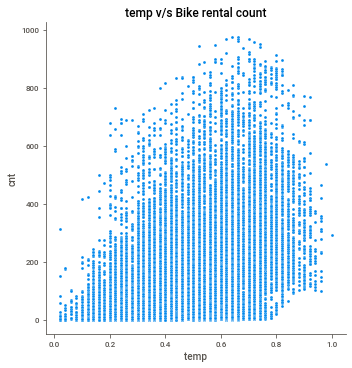

In [ ]:
plt.figure(figsize=(17,7))
sns.relplot('temp','cnt',data=df_hourly).set(title='temp v/s Bike rental count')
plt.show()


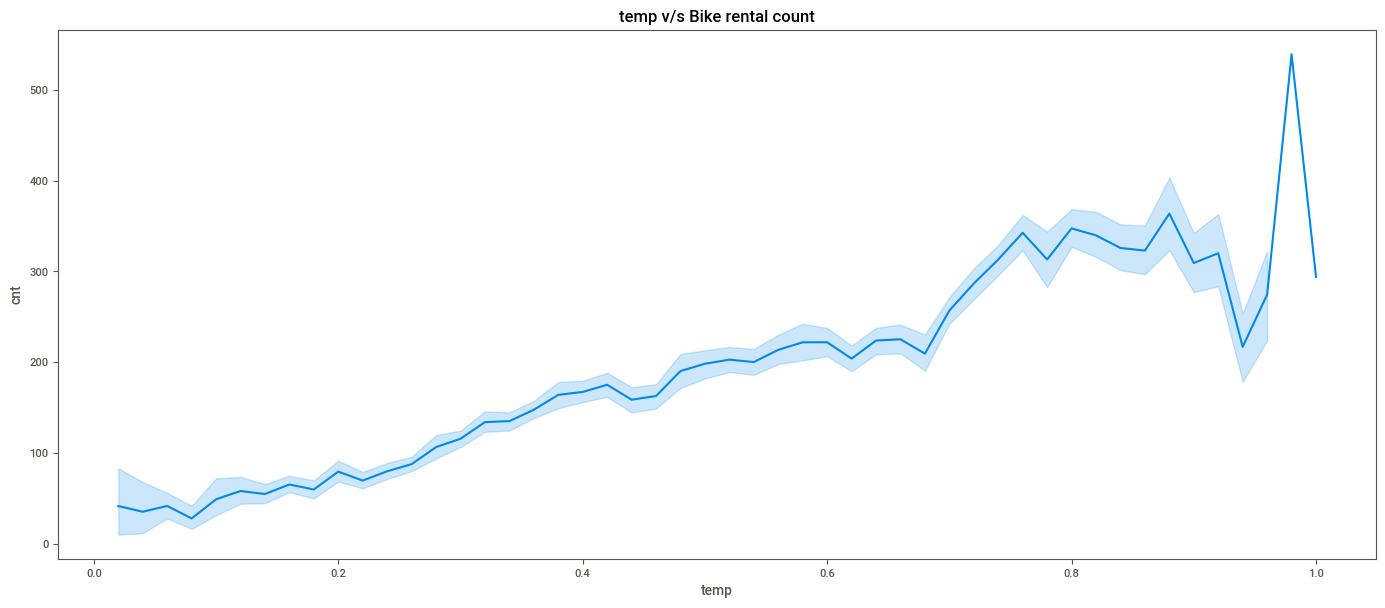

In [ ]:
plt.figure(figsize=(17,7))
sns.lineplot('temp','cnt',data=df_hourly).set(title='temp v/s Bike rental count')
plt.show()


* As per the above scatter and line plot we can see their is a liner relation between number of bike rented and temperature the warmmer the temp the more bike get rented.

<Figure size 1224x504 with 0 Axes>

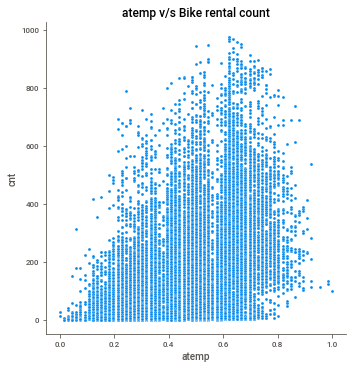

In [ ]:
plt.figure(figsize=(17,7))
sns.relplot('atemp','cnt',data=df_hourly).set(title='atemp v/s Bike rental count')
plt.show()


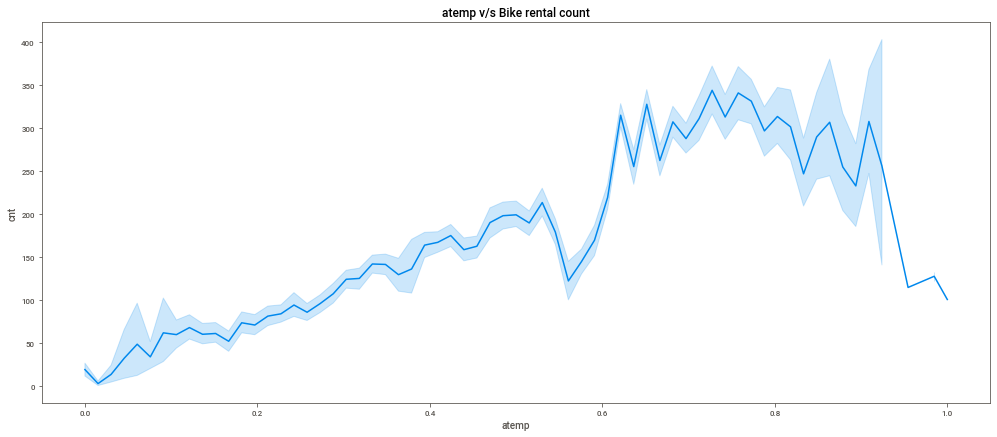

In [ ]:
plt.figure(figsize=(17,7))
sns.lineplot('atemp','cnt',data=df_hourly).set(title='atemp v/s Bike rental count')
plt.show()


* As we can see both the feature 'temp' and 'atemp' have similar distribution.

### humidity v/s Rental bike count for daily basis dataset

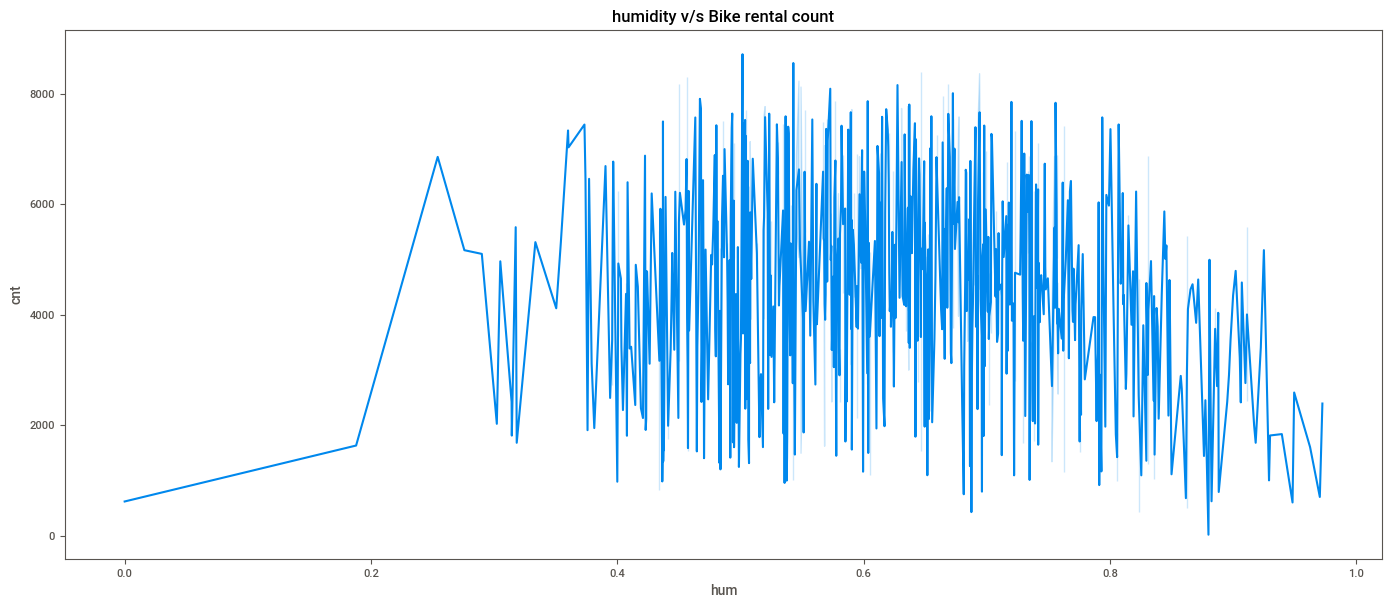

In [ ]:
plt.figure(figsize=(17,7))
sns.lineplot('hum','cnt',data=df_daily).set(title='humidity v/s Bike rental count')
plt.show()


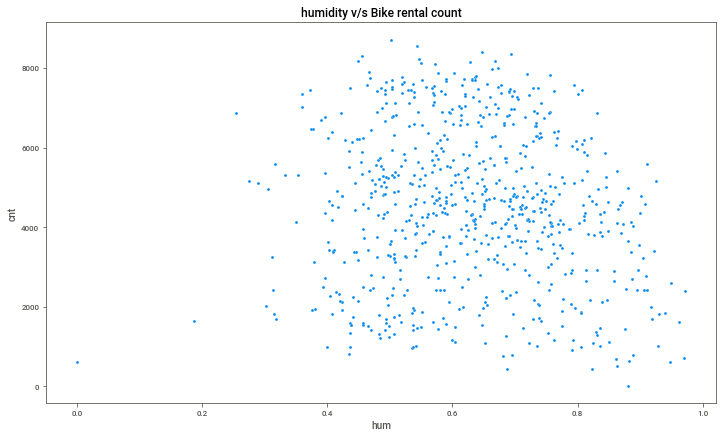

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot('hum','cnt',data=df_daily).set(title='humidity v/s Bike rental count')
plt.show()


* Above 2 plot is it is hard to see any relation between humidity and rental bike count.

### humidity v/s Rental bike count for hourly basis dataset

<Figure size 1224x504 with 0 Axes>

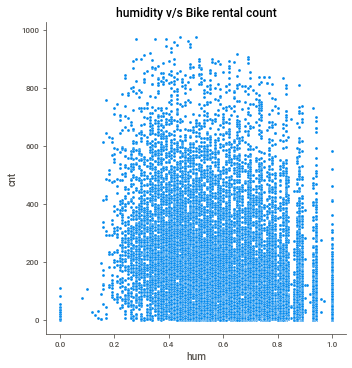

In [ ]:
plt.figure(figsize=(17,7))
sns.relplot('hum','cnt',data=df_hourly).set(title='humidity v/s Bike rental count')
plt.show()


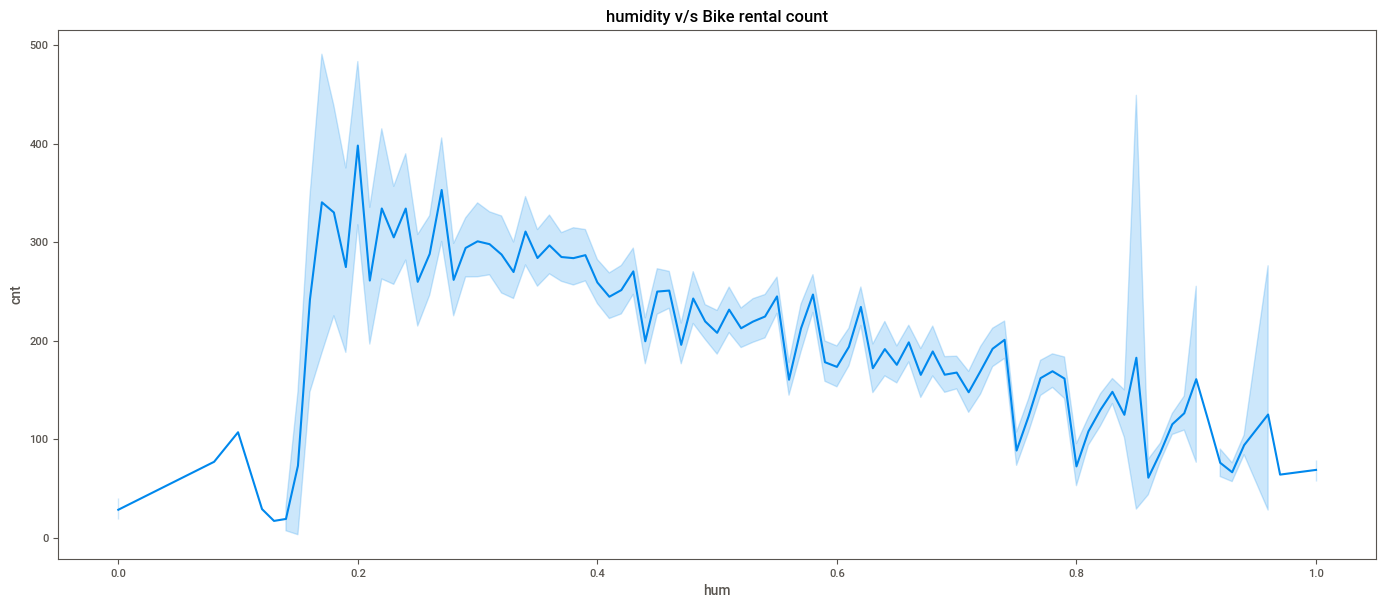

In [ ]:
plt.figure(figsize=(17,7))
sns.lineplot('hum','cnt',data=df_hourly).set(title='humidity v/s Bike rental count')
plt.show()


* As per the above scatter plot and line plot we can see their is a decreasing liner relation between number of bike rented and humidity. Rise in humidity level shows decrease in rented bike count.

### Windspeed v/s rental bike count for daily bases dataset

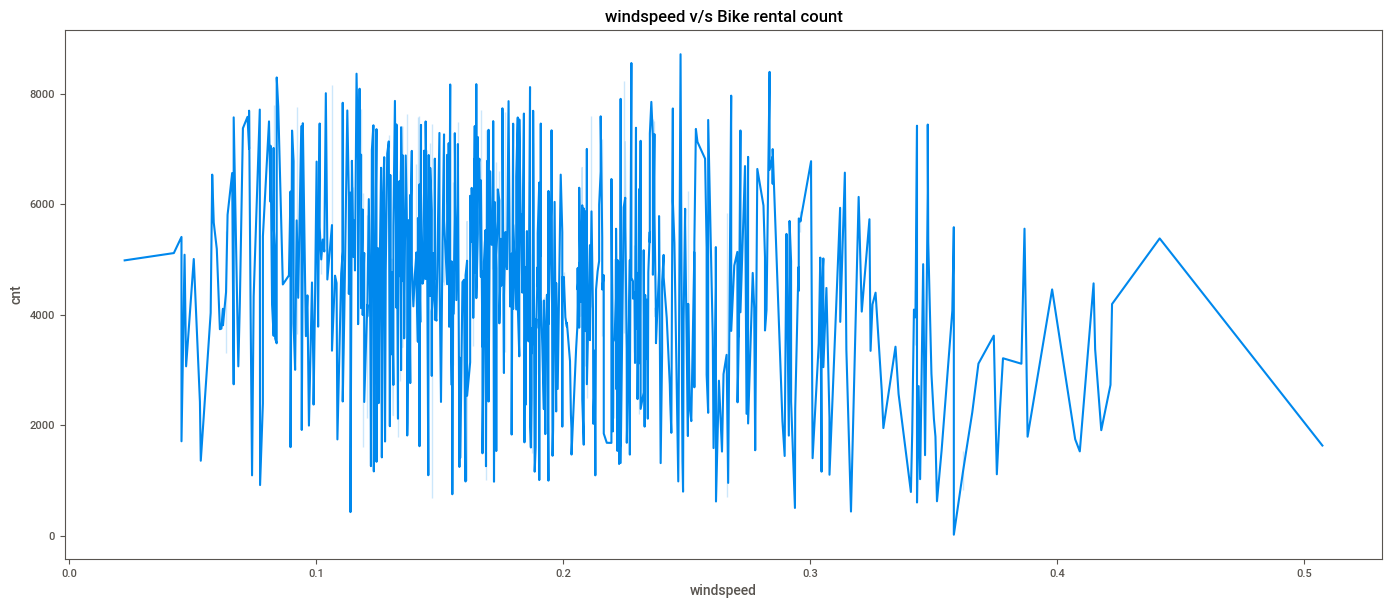

In [ ]:
plt.figure(figsize=(17,7))
sns.lineplot('windspeed','cnt',data=df_daily).set(title='windspeed v/s Bike rental count')
plt.show()


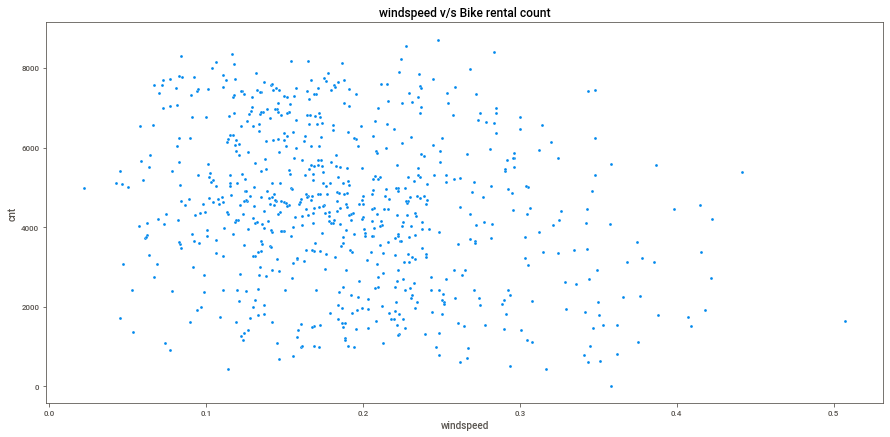

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot('windspeed','cnt',data=df_daily).set(title='windspeed v/s Bike rental count')
plt.show()


* Above 2 plot is it is hard to see any relation between windspeed and rental bike count.

### Windspeed v/s rental bike count for hourly bases dataset

<Figure size 1224x504 with 0 Axes>

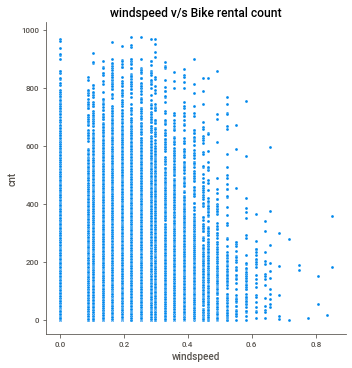

In [ ]:
plt.figure(figsize=(17,7))
sns.relplot('windspeed','cnt',data=df_hourly).set(title='windspeed v/s Bike rental count')
plt.show()


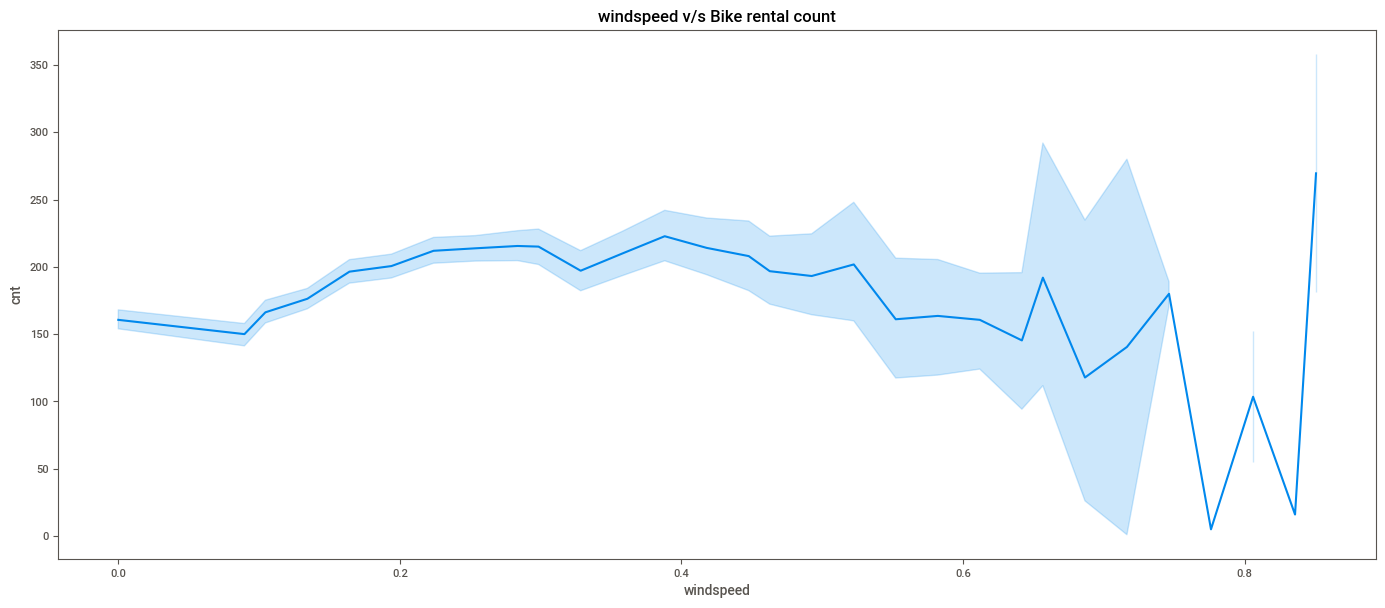

In [ ]:
plt.figure(figsize=(17,7))
sns.lineplot('windspeed','cnt',data=df_hourly).set(title='windspeed v/s Bike rental count')
plt.show()


* Feature 'windspeed' shows inverse relationship with rental bike counts. So for conculsion we can say too much wind and bike rentals dont seem to mix

In [ ]:
a = df_hourly.groupby('hr')['cnt'].sum().sort_values(ascending=False)
df = pd.DataFrame(a)
df

,cnt
hr,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


* In whole two years( 2011 and 2012) the total No. of count of rental bike is highest in 17th hour(5:00PM) of the day.

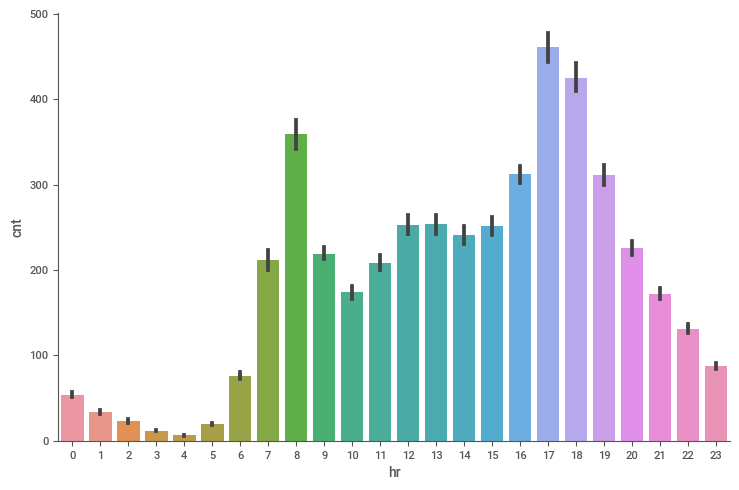

In [ ]:
#Factor Plot is used to draw a different types of categorical plot. 
#The default plot that is shown is a point plot, 
#but we can plot other seaborn categorical plots by using of kind parameter, like box plots, violin plots, bar plots, or strip plots.
sns.factorplot(x="hr",y="cnt",data=df_hourly,kind='bar',size=5,aspect=1.5)

* Demand for bike is high in hours 7-8 and 17-18 why because it is in general office time in most of the cities.

<Figure size 1600x500 with 0 Axes>

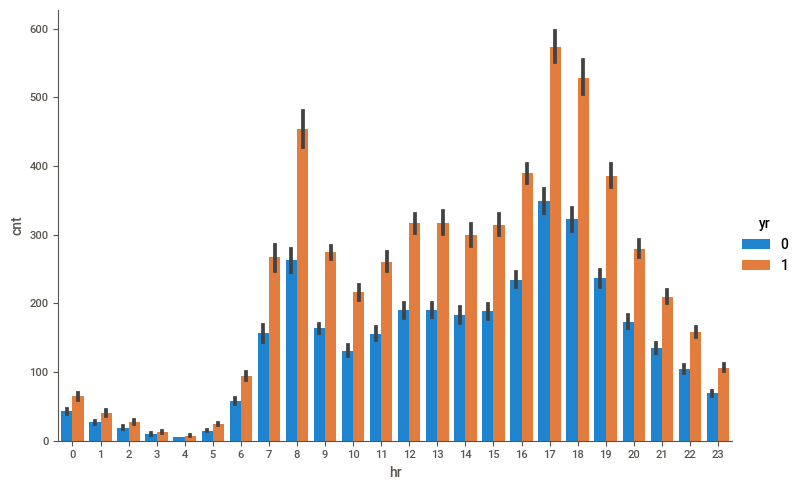

In [ ]:
plt.figure(figsize=(16,5))
sns.factorplot(x="hr",y="cnt",data=df_hourly,hue='yr',kind='bar',size=5,aspect=1.5)
plt.show()

* In 2012 Demand for bike is high in hours 7-8 and 17-18 than in 2011.

<Figure size 1600x500 with 0 Axes>

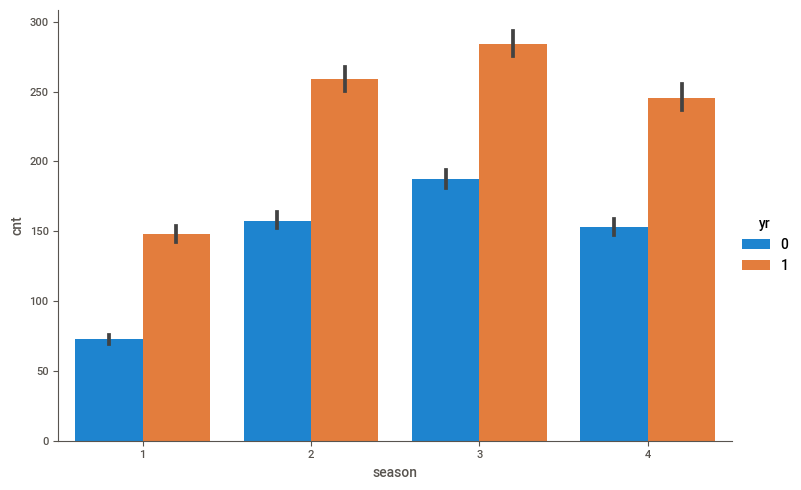

In [ ]:
plt.figure(figsize=(16,5))
sns.factorplot(x="season",y="cnt",data=df_hourly,hue='yr',kind='bar',size=5,aspect=1.5)
plt.show()

* From above barplot we can see that bike rental count is high in year 2012 than in year 2011 with respect to different season.

* Count is high from month 6th to 9th.

<Figure size 1600x500 with 0 Axes>

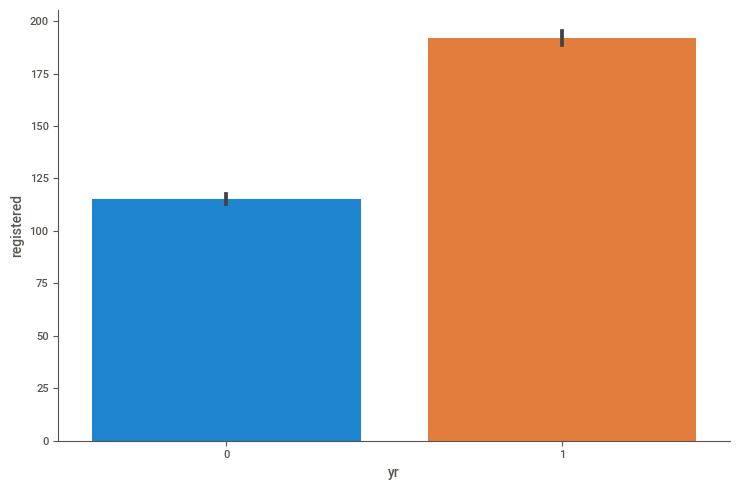

In [ ]:
plt.figure(figsize=(16,5))
sns.factorplot(x="yr",y="registered",data=df_hourly,kind='bar',size=5,aspect=1.5)
plt.show()

* In 2012 registered count of rental bike was higher than in 2011.

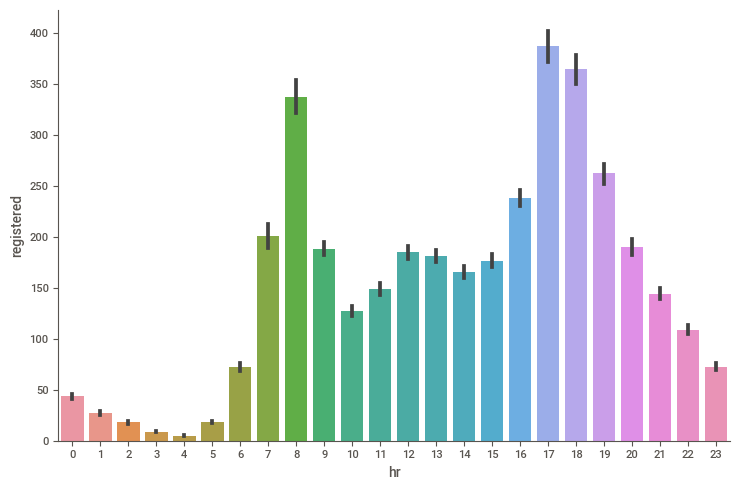

In [ ]:
sns.factorplot(x="hr",y="registered",data=df_hourly,kind='bar',size=5,aspect=1.5)

<Figure size 1600x500 with 0 Axes>

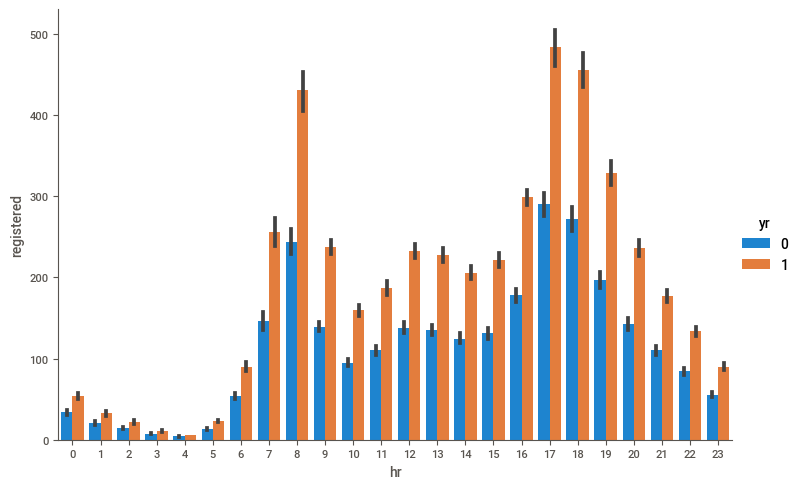

In [ ]:
plt.figure(figsize=(16,5))
sns.factorplot(x="hr",y="registered",data=df_hourly,hue='yr',kind='bar',size=5,aspect=1.5)
plt.show()

* In 2012 Demand for bike by registered/membership users is high in hours 7-8 and 17-18 than in 2011.

In [ ]:
# Total Count vs Year
print('Total number of bike rentals in year 0 i.e 2011:', df_daily[df_daily['yr']== 0]['cnt'].sum())
print('Total number of bike rentals in year 1 i.e 2012:', df_daily[df_daily['yr']== 1]['cnt'].sum())

Total number of bike rentals in year 0 i.e 2011: 1243103
Total number of bike rentals in year 1 i.e 2012: 2049576


<Figure size 1600x500 with 0 Axes>

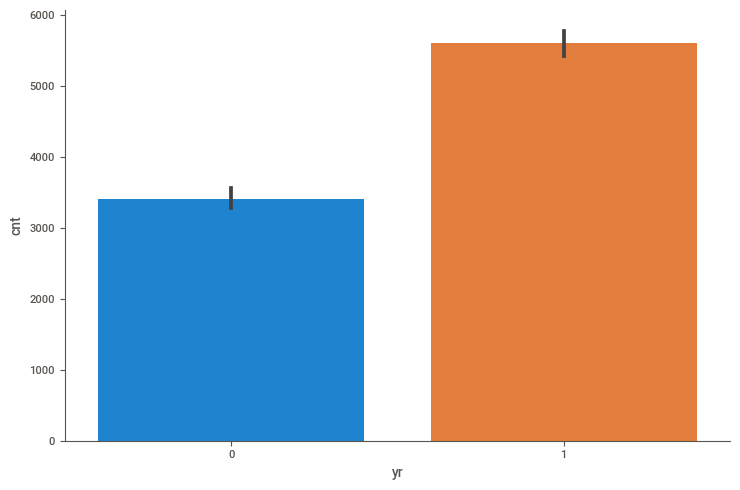

In [ ]:
plt.figure(figsize=(16,5))
sns.factorplot(x="yr",y="cnt",data=df_daily,kind='bar',size=5,aspect=1.5)
plt.show()

<Figure size 1600x500 with 0 Axes>

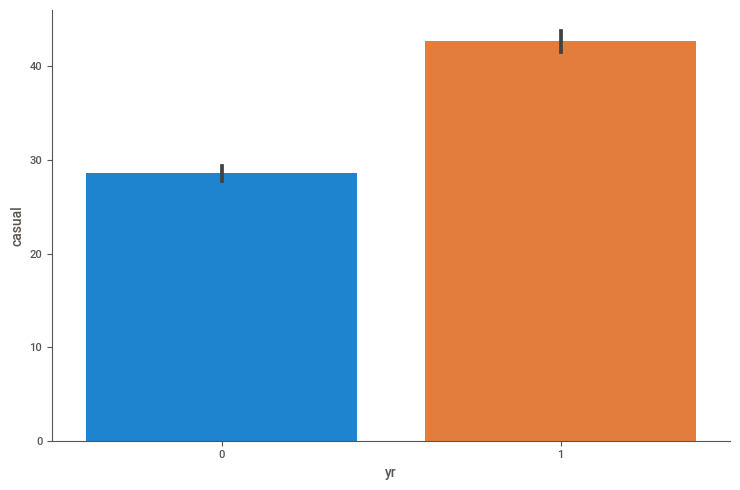

In [ ]:
plt.figure(figsize=(16,5))
sns.factorplot(x="yr",y="casual",data=df_hourly,kind='bar',size=5,aspect=1.5)
plt.show()

* In 2012 casual count of rental bike was higher than in 2011.

<Figure size 2000x500 with 0 Axes>

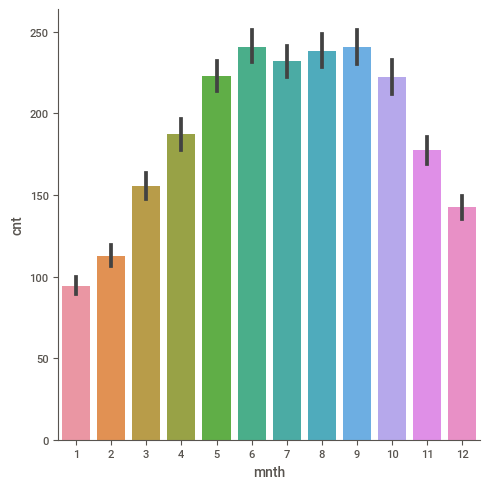

In [ ]:
plt.figure(figsize=(20,5))
sns.factorplot(x ='mnth', y ='cnt',kind = 'bar', data = df_hourly)

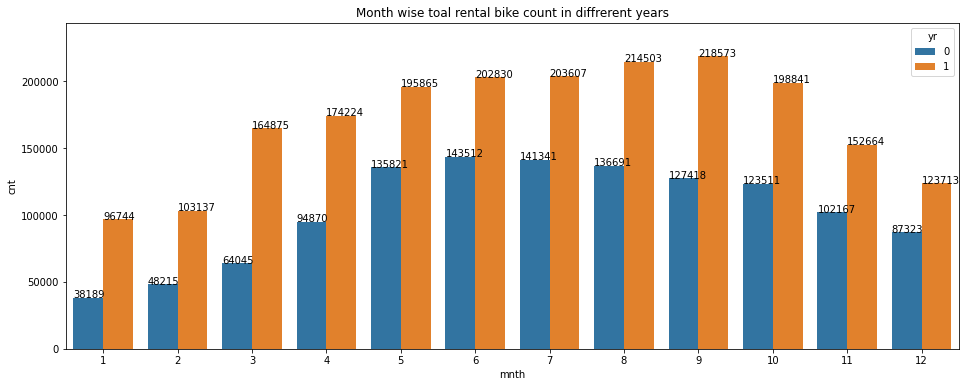

In [ ]:
#
plt.figure(figsize=(16,6))
ax = sns.barplot(data=df_hourly, x="mnth", y="cnt", hue='yr', estimator=sum,errwidth=0)
plt.title('Month wise toal rental bike count in diffrerent years')
for p in ax.patches:
    ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x(), p.get_height()))

* In 2012 Total rental bike demand was high in 9th(september) Month while in 2011 Toal rental bike demand was high in 6th(july) month.

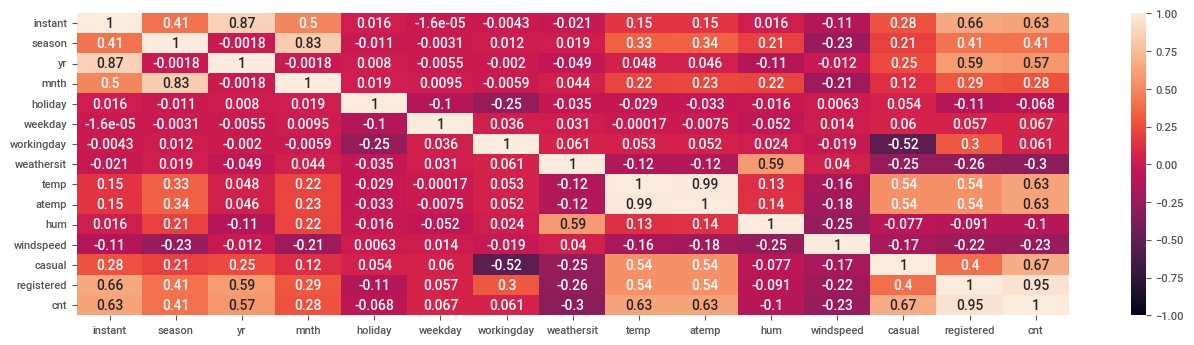

In [ ]:
plt.figure(figsize=(16,4))
sns.heatmap(df_daily.corr(), annot=True, vmin=-1, vmax=1)

In [ ]:
# plt.figure(figsize=(17,12))
# plotnumber=1
# for i in df_daily.columns:
#   plt.subplot(4,4,plotnumber)
#   sns.scatterplot(x=i,y='cnt',data=df_daily)
#   plotnumber += 1
# plt.tight_layout()

In [ ]:
# plt.figure(figsize=(17,12))
# plotnumber=1
# for i in df_daily.columns:
#   plt.subplot(4,4,plotnumber)
#   sns.scatterplot(x=i,y='casual',data=df_daily)
#   plotnumber += 1
# plt.tight_layout()

In [ ]:
# plt.figure(figsize=(17,10))
# plotnumber=1
# for i in df_daily.columns:
#   plt.subplot(4,4,plotnumber)
#   sns.scatterplot(x=i,y='registered',data=df_daily)
#   plotnumber += 1
# plt.tight_layout()

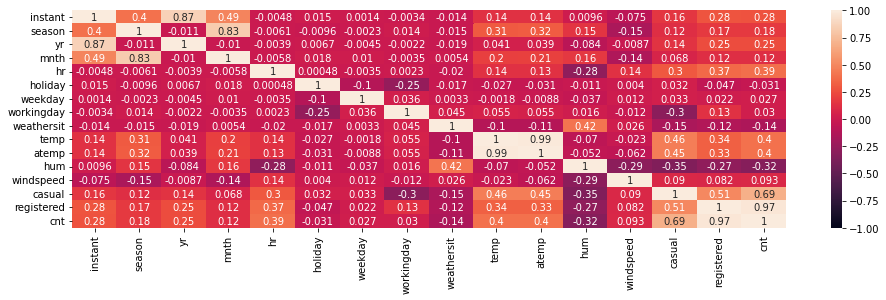

In [ ]:
plt.figure(figsize=(16,4))
sns.heatmap(df_hourly.corr(), annot=True, vmin=-1, vmax=1)

In [ ]:
df_hourly.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
df_daily.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

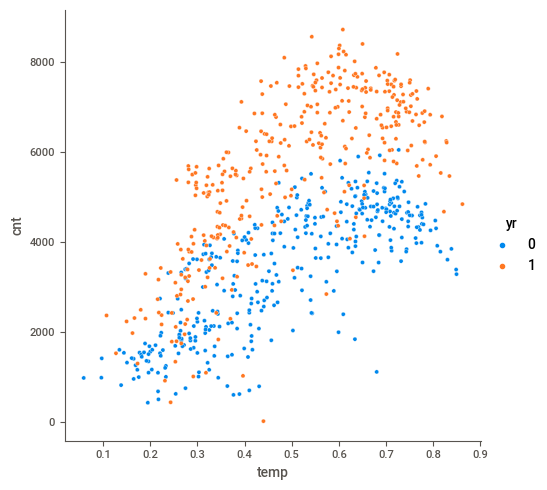

In [ ]:
#fig,axs = plt.subplots(2,1, figsize = (12,12))
sns.relplot(data=df_daily, x='temp', y='cnt', hue='yr')
#sns.relplot(data=df_daily, x='temp', y='cnt', hue='season', ax=axs[1])

In [ ]:
import seaborn as sns

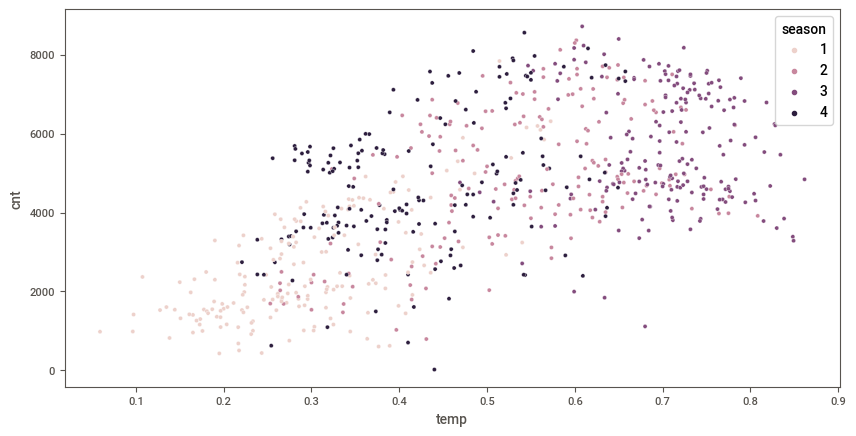

In [ ]:
#fig,axs = plt.subplots(1,1, figsize = (12,12))
#sns.relplot(data=df_daily, x='temp', y='cnt', hue='yr' , ax=axs[0])
#c = ['red',"black","orange","purple"]
#sns.relplot(x='temp', y='cnt', hue='season',data=df_daily)
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_daily, x="temp", y="cnt", hue="season")

In [ ]:
# import plotly.graph_objects as go
# import plotly.express as ex

In [ ]:
# dfof_2011 = df_daily[df_daily['yr']==2011]
# dfof_2012 = df_daily[df_daily['yr']==2012]
# # season (1:winter, 2:spring, 3:summer, 4:fall)
# dfof_winter = df_daily[df_daily['season']==1]
# dfof_spring = df_daily[df_daily['season']==2]
# dfof_summer = df_daily[df_daily['season']==3]
# dfof_fall = df_daily[df_daily['season']==4]


In [ ]:
# ## Using figure function to define the data argument and setting it to the bars for 2011 and 2012
# fig = go.Figure(data = [go.Bar(x = dfof_2011['season'], y = dfof_2011['cnt'], marker_color = 'indianred',name = '2011'),
#                 go.Bar(x = dfof_2012['season'], y = dfof_2012['cnt'], marker_color = 'skyblue',name = '2012')
#                 ])

# ## Setting the titles, xaxis and yaxis  

# fig.update_layout(title='total rental bike count season wise in different year',
#                   xaxis_title='season',
#                   yaxis_title='Daily bike rental count'
#                   )
# fig



# # ## Using figure function to define the data argument and setting it to the bars for 2011 and 2012
# # fig = go.Figure(data = [go.Bar(x = df_2011['season'], y = df_2011['count_daily'], marker_color = 'indianred',name = '2011'),
# #                 go.Bar(x = df_2012['season'], y = df_2012['count_daily'], marker_color = 'skyblue',name = '2012')
# #                 ])

# # ## Setting the titles, xaxis and yaxis  
# # fig.update_layout(title='Total Count Season Wise',
# #                    xaxis_title='Season',
# #                    yaxis_title='Daily Count',
# #                    )

# # fig

## Data Preprocessing

In [ ]:
df = df_daily.copy()

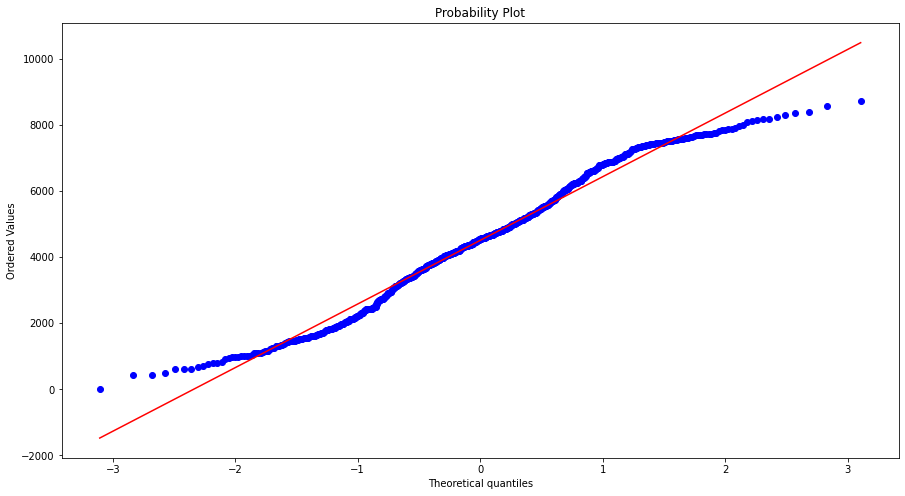

In [ ]:
# Comparison of distribution of dataset with Normal distribution
import scipy
from scipy import stats
#Normal plot
fig=plt.figure(figsize=(15,8))
stats.probplot(df_daily.cnt.tolist(),dist='norm',plot=plt)
plt.show()

* From above probability plot, some target variable data points are deviating from normality.

> 1. Missing value check

In [ ]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

 No missing value in dataset.

> 2. Duplicasy Check

In [ ]:
df.duplicated().sum()

0

 No duplicate value in dataset.

In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
# we can drop some redundant features and target variabl
redundant_col = ['instant','dteday']
df = df.drop(redundant_col,axis=1)
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

> 3. Outliers check

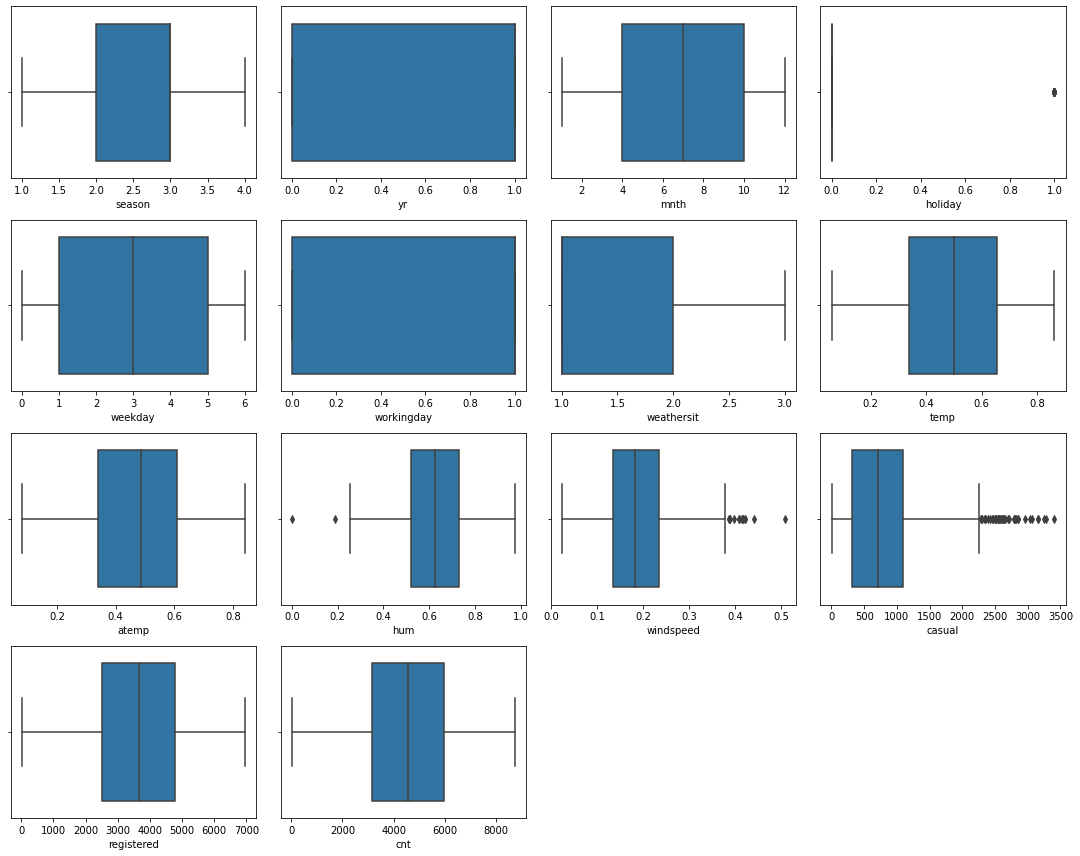

In [ ]:
# checking for outliers 
plt.figure(figsize = (15,12))
plotnumber = 1
for column in df.columns:
    ax = plt.subplot(4,4,plotnumber) # here plotnumber is showing perticular plot where we are plotting histogram for current iteration
    sns.boxplot(x=column,data =df)
    plotnumber = plotnumber + 1
plt.tight_layout()

* From above box plots for column we can see there are outliers presence in humidity, Windspeed and casual. Since from domail knowledge and skewness check from sweetviz file, the outliers in humidity and windspeed does not seems like outliers so we can proceed further without treating them.

> 4. Scalling data :- Since there is no huge variance in the columns value so here is no need to normalise tha dataset.

## Feature Engineering 

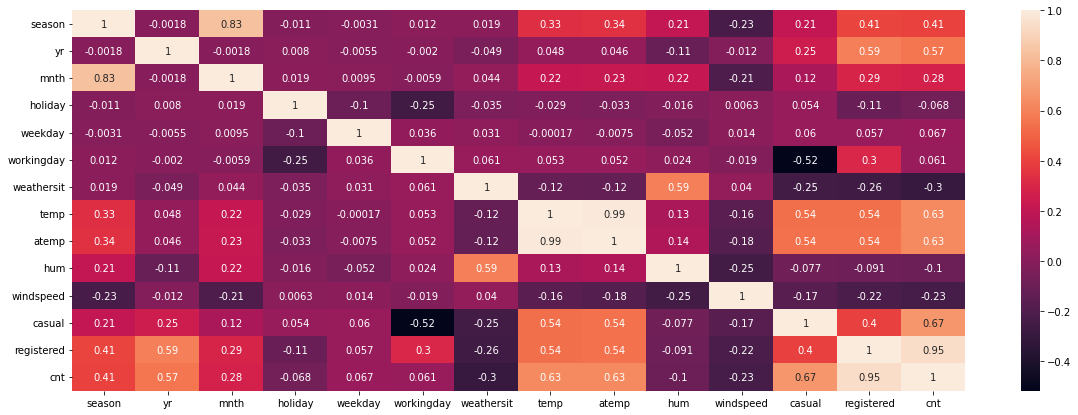

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True)

### Correlation Analysis:
* temp and humidity features has got positive and negative correlation with count respectively.Although the correlation between them are not very prominent still the count variable has got little dependency on "temp" and "humidity".
* "atemp" is variable is not taken into since "atemp" and "temp" has got strong correlation with each other. During model building any one of the variable has to be dropped.
* "Casual" and "Registered" are also not taken into account since they are leakage variables in nature and need to dropped during model building

In [ ]:
column = ['atemp','casual','registered']
df_new = df.drop(column,axis=1)

In [ ]:
df_new.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## Model creation

In [ ]:
x = df_new.drop('cnt',axis=1)
y = df_new['cnt']

In [ ]:
x.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900


In [ ]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [ ]:
# spliting dataset into train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=35) 
# here 0.3 means we are spliting data in such a way that
# X_test got 30 % of data and X_train got 70% of data 

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(511, 10)
(220, 10)
(511,)
(220,)


 > 1. Linear Regression 

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Intercept and coefficient of best fit line
print(lr.intercept_)
print('-------------')
print(lr.coef_)

1811.1676576331447
-------------
[  497.85311794  2019.2073913    -38.62671078  -525.30061342
    52.59497888    60.82999223  -619.64619082  5027.60912241
  -917.25211342 -3068.52036387]


## Model Evaluation

In [ ]:
y_predict = lr.predict(x_test)
y_predict

array([2386.71751132, 4376.8401489 , 4840.47590656, 3208.66744273,
       3413.45020586, 5076.39276652, 3764.70784678, 3903.81598566,
       3915.1328424 , 3236.42695584, 4467.56232325, 6553.1919482 ,
       6608.92082965, 2445.98830163, 6485.93040498, 2760.39880402,
       2092.75692852, 3103.15558634, 4282.79619532, 5121.80799591,
       2983.38807088, 4839.54066801, 6291.86990063, 6929.04569307,
       3458.71720627, 3926.22717148, 4670.53992056, 6117.49161353,
       5357.5340435 , 3085.8712873 , 5405.67713064, 5893.06367354,
       6937.06837509, 3221.48814488, 4282.19724513, 4640.48993175,
       3204.63476793, 3926.46884269, 4634.43909517, 6636.87823474,
       4480.75093387, 3192.27800973, 3452.42518863, 7686.91932346,
       4433.57149816, 4939.12855637, 2993.90795068, 1045.69066566,
       8060.27344525, 4646.51713113, 3599.87845198, 4946.61683119,
       4315.52955442, 2524.34029314, 4152.78593395, 1923.15995458,
       3215.99317837, 5084.23473808, 6265.20846175, 4123.87657

In [ ]:
y_test

339    2594
165    5180
161    4966
366    1951
337    3485
       ... 
462    6857
10     1263
502    7384
162    4460
576    7105
Name: cnt, Length: 220, dtype: int64

In [ ]:
y_train_predict = lr.predict(x_train)

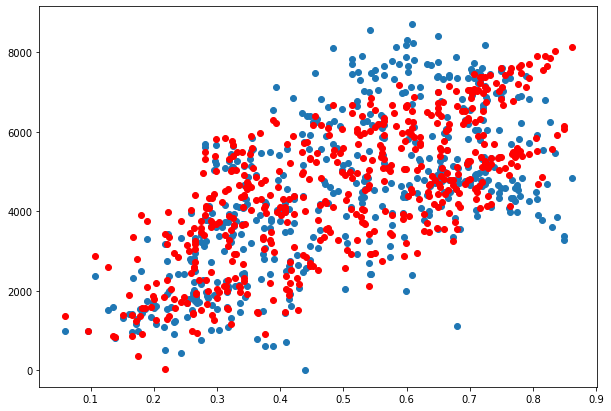

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x_train['temp'],y_train)
plt.scatter(x_train['temp'],y_train_predict,color='red')

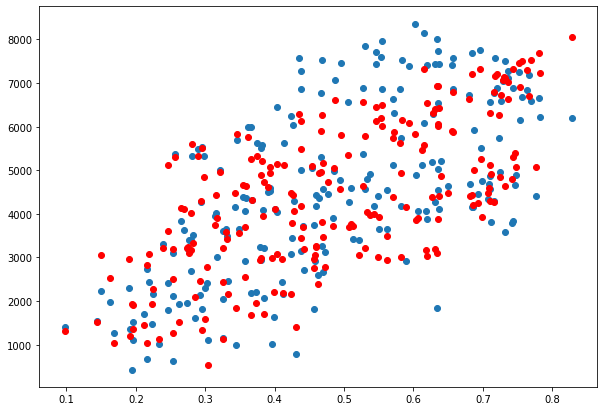

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x_test['temp'],y_test)
plt.scatter(x_test['temp'],y_predict,color='red')

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
r2_value_train= r2_score(y_train,y_train_predict) # 0.7805252252578766 ( random_state=50)
r2_value_train

0.7805252252578767

In [ ]:
mean_squared_error(y_train,y_train_predict) 

815133.5008896876

In [ ]:
x_train.shape

(511, 10)

In [ ]:
adjusted_r2_train = 1 - (((1-r2_value_train)*(511-1))/(511-10-1))

# here n = 220(Total no. of rows in x_test )
# p =10 ( Total no. of predictors in x_test)

In [ ]:
adjusted_r2_train # 0.7761357297630341

0.7761357297630342

In [ ]:
r2_value_test= r2_score(y_test,y_predict) # 0.8231919187657247 
                                          # 0.8356966339390246 (old columns )
r2_value_test

0.8356966339390248

In [ ]:
mean_squared_error(y_test,y_predict) # 703513.3573458007
# 628374.1804798032

628374.1804798025

In [ ]:
adjusted_r2_test = 1 - (((1-r2_value_test)*(220-1))/(220-10-1))

# here n = 220(Total no. of rows in x_test )
# p =10 ( Total no. of predictors in x_test)

In [ ]:
adjusted_r2_test # 0.814732201960257 # 0.8278352288643368

0.827835228864337

* The R-squared or coefficient of determination is 0.82 on average , it means that predictor is only able to predict 82% of the variance in the target variable which is contributed by independent variables.

In [ ]:
# After applying pca 
# r2_value = 0.05909136402654758
# adjusted r2_value = 0.014071812066095313

In [ ]:
# After dropping humidity 
# r2_value = 0.8192452520878688
# adjusted r2_value = 0.8105966995561878

In [ ]:
# After dropping humidity and windspeed
# r2_value = 0.8064195457034271
# adjusted r2_value = 0.7971573230098112

> 2. Suport Vector Regressor :- Support Vector Machine is robust to outliers.

In [ ]:
from sklearn.svm import SVR
model = SVR()
model.fit(x_train, y_train)

SVR()

In [ ]:
y_train_predict = model.predict(x_train)

In [ ]:
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

In [ ]:
# check the accuracy on the training set
print(model.score(x_train, y_train))

0.01345425402477951


In [ ]:
svm_r2_value_train= r2_score(y_train,y_train_predict) 
svm_r2_value_train

0.01345425402477951

In [ ]:
svm_adjusted_r2_train = 1 - (((1-svm_r2_value_train)*(511-1))/(511-10-1))
svm_adjusted_r2_train

-0.006276660894724895

### Hyper parameter Tuning in Suport Vector Macine Analysis

In [ ]:
svr = SVR() # initializing the model

In [ ]:
from sklearn.model_selection import GridSearchCV
# it work for us with predefined parameters by us
#It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. 
#So,in the end, you can select the best parameters from the listed hyperparameters.

# defining parameters
parameters = {'C': [0.1, 1, 10, 100, 1000,10000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,0.00001]} 
grid = GridSearchCV(svr,parameters, refit = True,verbose = 1,cv=3) # cross validation score do multiple calculation for diff diff datsets
# fitting the model for grid search
grid.fit(x_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05]},
             verbose=1)

In [ ]:
grid.best_params_

{'C': 10000, 'gamma': 0.1}

In [ ]:
grid.best_score_

0.7945270377087813

In [ ]:
# Now create a model object with best parameters
model1 = SVR(C=1000, gamma = 0.1)
model1.fit(x_train,y_train)

SVR(C=1000, gamma=0.1)

In [ ]:
# check the accuracy on the training set
print(model1.score(x_train, y_train)) # here score is nothing but r2_score of the model

0.8245552304685376


In [ ]:
y_train_predict = model1.predict(x_train)

In [ ]:
svm_r2_value_train= r2_score(y_train,y_train_predict) 
svm_r2_value_train

0.8245552304685376

In [ ]:
svm_adjusted_r2_train = 1 - (((1-svm_r2_value_train)*(511-1))/(511-10-1))
svm_adjusted_r2_train

0.8210463350779084

In [ ]:
# check the accuracy on the test set
print(model1.score(x_test, y_test))

0.8248572819188237


In [ ]:
y_test_predict = model1.predict(x_test)

In [ ]:
svm_r2_value_test= r2_score(y_test,y_test_predict) 
svm_r2_value_test

0.8248572819188237

In [ ]:
svm_adjusted_r2_test = 1 - (((1-svm_r2_value_test)*(220-1))/(220-10-1))
svm_adjusted_r2_test

0.8164772475608727

> 3. Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_train_predict = dt.predict(x_train)

In [ ]:
y_train

717    5557
383    3292
647    6392
304    4068
503    7639
       ... 
249    1996
448    3372
33     1550
271    4839
713    5611
Name: cnt, Length: 511, dtype: int64

In [ ]:
y_train_predict

array([5557., 3292., 6392., 4068., 7639., 7359., 4127., 3285., 3422.,
       2376., 4318., 7538., 3867., 4991., 3915., 3068., 4570., 4602.,
       2423., 1944., 1317., 3348., 2034., 2566., 5336., 6436., 4972.,
       4066., 5102., 7466., 5810., 4362., 2368., 4862., 4302., 1891.,
       3351., 1471., 4968., 6370., 2417., 4118., 4727., 2475., 1421.,
       2132., 4036., 1600., 5572., 1685., 6917.,  986., 1530., 4186.,
       4760., 7494., 4905., 6359., 3129., 1011., 6861., 4592., 2496.,
       4845., 6639., 6398., 2633.,  981., 4539., 2999., 6852., 7013.,
       1985., 3620., 2744., 4486., 3243., 7713., 3487., 3423., 4758.,
       2311., 2416., 4266., 4569.,  605., 3614., 6825., 7006., 4833.,
       7030., 6043., 7736., 5041., 2455., 1495., 5729., 6421., 1969.,
       7375., 3873., 5312., 1204., 4359., 3750., 3351., 3368., 6192.,
       5312., 2115., 2028., 6169., 1013., 5130., 7446., 6606., 3425.,
       5895., 2743., 5445., 3784., 6544., 3709., 4940., 1248., 1796.,
       4773., 5976.,

In [ ]:
dt_r2_value_train= r2_score(y_train,y_train_predict) 
dt_r2_value_train

1.0

In [ ]:
dt_adjusted_r2_train = 1 - (((1-dt_r2_value_train)*(511-1))/(511-10-1))
dt_adjusted_r2_train

1.0

#### This is the case of Overfitting Model performing good in Train dataset but prforming poor for test datset(since we know decision tree is prone to overfitting easily)

### Hyper Parameter Tuning in Decision Tree Analysis

* Criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.


* Splitter: This is how the decision tree searches the features for a split. The default value is set to “best”. That is, for each node, the algorithm considers all the features and chooses the best split. If you decide to set the splitter parameter to “random,” then a random subset of features will be considered.



* max_depth: This determines the maximum depth of the tree.  we use a depth of two to make our decision tree. ... This will often result in over-fitted decision trees. The depth parameter is one of the ways in which we can regularize the tree, or limit the way it grows to prevent over-fitting..The tree perfectly fits the training data and fails to generalize on testing data.



* min_samples_split:Ideal range is 1 to 40.min_samples_split specifies the minimum number of samples required to split an internal node, while min_samples_leaf specifies the minimum number of samples required to be at a leaf node.



* min_samples_leaf: The minimum number of samples required to be at a leaf node.Similarr to min sample split ,this describes the minimum number of samples at the leaf,the base of tree.Ideal range is 1 to 20.(thershold value to make a decision)like 40


In [ ]:
paramas ={
    'splitter':('best','random'),
    'max_depth':(list(range(1,20))),
    'min_samples_split':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'min_samples_leaf':(list(range(1,20)))
}


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
tree_new = DecisionTreeRegressor(random_state=35)
grid = GridSearchCV(tree_new,paramas)


In [ ]:
# fitting model for grid search
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=35),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18, 19,
                                               20],
                         'splitter': ('best', 'random')})

In [ ]:
grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 14,
 'splitter': 'best'}

In [ ]:
dt1 = DecisionTreeRegressor(max_depth= 10, min_samples_leaf= 1, min_samples_split= 14, splitter= 'best')

In [ ]:
dt1.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=14)

In [ ]:
y_train_predict = dt1.predict(x_train)

In [ ]:
dt_r2_value_train= r2_score(y_train,y_train_predict) 
dt_r2_value_train

0.9390010716140661

In [ ]:
y_test_predict = dt1.predict(x_test)

In [ ]:
dt_r2_value_test= r2_score(y_test,y_test_predict) 
dt_r2_value_test

0.8165921437172606

> 4. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
rf.fit(x_train,y_train)

In [ ]:
y_train_predict = rf.predict(x_train)

In [ ]:
rf_r2_value_train= r2_score(y_train,y_train_predict) 
rf_r2_value_train

0.9813027139331361

In [ ]:
y_test_predict = rf.predict(x_test)

In [ ]:
rf_r2_value_test = r2_score(y_test,y_test_predict)
rf_r2_value_test

0.8992242001547068

### Hyper Parameter Tuning in RandomForest Anlysis

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators  = [int(x) for x in np.linspace(start=10,stop=2000,num=10)]
max_features = ['auto','sqrt','log2']
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True,False]

params = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}



In [ ]:
randomforest_new = RandomForestRegressor(random_state=35)
grid = RandomizedSearchCV(estimator=randomforest_new,param_distributions=params,n_iter=100,verbose=2,n_jobs=-1,random_state=35,cv=3)

In [ ]:
grid.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=35),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 231, 452, 673, 894,
                                                         1115, 1336, 1557, 1778,
                                                         2000]},
                   random_state=35, verbose=2)

In [ ]:
grid.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

In [ ]:
rf1 = RandomForestRegressor(n_estimators = 2000, min_samples_split = 2, min_samples_leaf = 2, max_features= 'sqrt', max_depth = 50, bootstrap = False)
rf1.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      min_samples_leaf=2, n_estimators=2000)

In [ ]:
y_train_predict = rf1.predict(x_train)

In [ ]:
rf_r2_value_train = r2_score(y_train,y_train_predict) # 0.9844092711587625 n_estimator =200,2000
                                                      # 0.9845991574397626 n_estimator =10,2000
rf_r2_value_train

0.9845991574397626

In [ ]:
y_test_predict = rf1.predict(x_test)

In [ ]:
rf_r2_value_test = r2_score(y_test,y_test_predict) # 0.9008300963563863 n_estimator =200,2000
                                                   # 0.9006101236328979 n_estimator =10,2000
rf_r2_value_test

0.9006101236328979

> 5. Gradient Boosting

In [ ]:
## importing the model library
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor() ## object creation
gbr.fit(x_train,y_train) ## fitting the data

GradientBoostingRegressor()

In [ ]:
y_train_predict = gbr.predict(x_train)

In [ ]:
gbr_r2_value_train = r2_score(y_train,y_train_predict)
gbr_r2_value_train

0.9585861487623284

In [ ]:
y_test_predict = gbr.predict(x_test)

In [ ]:
gbr_r2_value_test = r2_score(y_test,y_test_predict)
gbr_r2_value_test

0.8900408196032145

> 6. XGBoost technique

In [ ]:
!pip install xgboost # installing xgboost library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## model creation
from xgboost import XGBRegressor#importing the model library
xgb=XGBRegressor() ## object creation
xgb.fit(x_train,y_train)# fitting the data

[08:31:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_train_predict = xgb.predict(x_train)

In [ ]:
xgb_r2_value_train = r2_score(y_train,y_train_predict)
xgb_r2_value_train

0.9553424726028372

In [ ]:
y_test_predict = xgb.predict(x_test)

In [ ]:
xgb_r2_value_test = r2_score(y_test,y_test_predict)
xgb_r2_value_test

0.8956987253733063

### Hyperparameter Tuning in XGBoost technique

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params = {'learning_rate': [0.01,0.02, 0.03,0.04,0.05, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7,0.001,0.0001],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'max_depth': (list(range(1,20))),
              'n_estimators': [int(x) for x in np.linspace(start=10,stop=2000,num=5)],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200]}

# gamma --- It is for Tree prunning 
# reg_alpha and req_lambda ---- are for Regularization to make model free from overfitting 
#n_estimators--number of decision tree

In [ ]:
## model creation
from xgboost import XGBRegressor#importing the model library

In [ ]:
XGB_new=XGBRegressor(random_state=35,verbosity=0)
grid= RandomizedSearchCV(estimator =XGB_new,param_distributions=params, n_iter=100, cv=3, 
                               verbose=2, random_state=35, n_jobs=-1)

In [ ]:
grid.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=XGBRegressor(random_state=35, verbosity=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'gamma': [0, 0.1, 0.2, 0.4, 0.8, 1.6,
                                                  3.2, 6.4, 12.8, 25.6, 51.2,
                                                  102.4, 200],
                                        'learning_rate': [0.01, 0.02, 0.03,
                                                          0.04, 0.05, 0.06, 0.1,
                                                          0.15, 0.2, 0.25,
                                                          0.300000012, 0.4, 0.5,
                                                          0.6, 0.7, 0.001,
                                                          0.0001],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                              

In [ ]:
grid.best_params_

{'reg_lambda': 0.1,
 'reg_alpha': 12.8,
 'n_estimators': 507,
 'max_depth': 4,
 'learning_rate': 0.02,
 'gamma': 25.6}

In [ ]:
XGB1=XGBRegressor(reg_lambda= 0.1, reg_alpha= 12.8, n_estimators=507, max_depth=4, learning_rate=0.02, gamma=25.6)
XGB1.fit(x_train,y_train)

[09:19:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(gamma=25.6, learning_rate=0.02, max_depth=4, n_estimators=507,
             reg_alpha=12.8, reg_lambda=0.1)

In [ ]:
y_train_predict = XGB1.predict(x_train)

In [ ]:
xgb_r2_value_train = r2_score(y_train,y_train_predict) # 0.9302209482547908 n_estimator = 10,200
                                                       # 0.981789315081144 n_estimator = 10,2000
xgb_r2_value_train

0.981789315081144

In [ ]:
y_test_predict = XGB1.predict(x_test)

In [ ]:
xgb_r2_value_test = r2_score(y_test,y_test_predict) # 0.8906917168396066 n_estmator = 20,200
                                                    # 0.8883176792314922 n_estmator = 10,200
                                                    # 0.9056145741040783 n_estmator = 10,2000
xgb_r2_value_test

0.9056145741040783

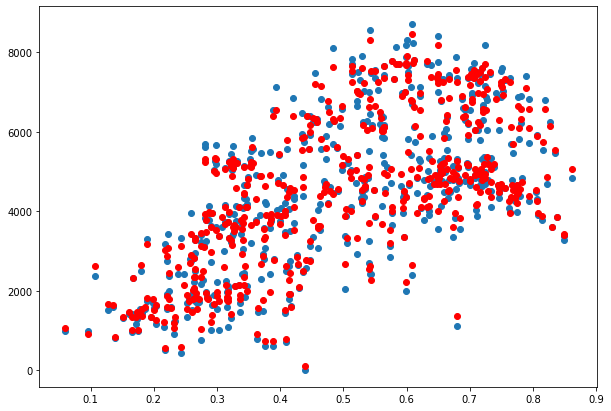

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x_train['temp'],y_train)
plt.scatter(x_train['temp'],y_train_predict,color='red')

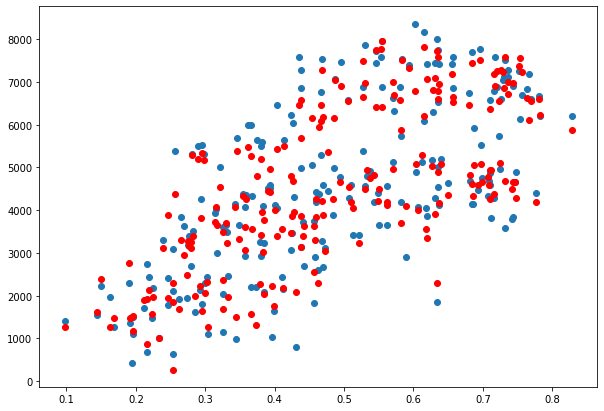

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x_test['temp'],y_test)
plt.scatter(x_test['temp'],y_test_predict,color='red')

> 7. K_Nearest_Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
Error_rate =[]
for k in range(1,11):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    Error_rate.append(np.mean(y_test != y_pred))

In [ ]:
y_test != y_pred

339    True
165    True
161    True
366    True
337    True
       ... 
462    True
10     True
502    True
162    True
576    True
Name: cnt, Length: 220, dtype: bool

Text(0, 0.5, 'error rate')

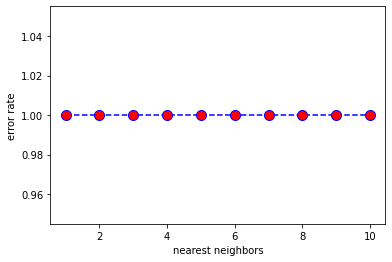

In [ ]:
plt.plot(range(1,11),Error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('nearest neighbors')
plt.ylabel('error rate')

* From above graph we can see that for all value of k(neighbors) erro rate is 1.00(100%) that means for this dataset knn model is poorly fitted.

So From above we can see by applying several Models in our dataset, the model Xtreme Gradient Bossting is performing well with highest r2 value 0.9056145741040783.